# ⚽Skill-Based Football Player Clustering

## **Project Code:** PRCP-1004-Fifa20
## **project ID :** PTID-CDS-DEC-25-3592  
- **Intern Name:** Aniket Jain
- **Start Date:** 18-DEC-2025
- **Domain:** Sports Analytics
---

## 🎯 PROJECT OBJECTIVES

### Task 1: Complete Data Analysis Report
- Understand every aspect of the dataset
- Identify patterns and insights
- Clean and prepare data for modeling

### Task 2: Predictive Model Development
- Build machine learning models to predict Player in cluster
- Identify key factors that indicate default risk
- Compare models and recommend the best one

---

## 📊 DATASET INFORMATION
- **File Used:** players_20.csv (Main training data)
- **Focus:** Deep, quality analysis on single file
- **Approach:** Quality over Quantity

---

## 🛠️ METHODOLOGY
1. **Data Loading & Understanding**
2. **Exploratory Data Analysis (EDA)**
3. **Data Cleaning & Preprocessing**
4. **Feature Engineering**
5. **Feature Selection**
6. **Model Building & Evaluation**
7. **Model Comparison & Recommendation**

---

**Let's begin! 🚀**

# Unsupervised
### Unsupervised learning is a type of machine learning where the model works on unlabeled data.
That means:

* There is no target/output column

* The algorithm tries to discover patterns, structures, or relationships in the data on its own

## Required Libraies

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Read the Data

In [118]:
pd.read_csv("players_20.csv")

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

In [119]:
df = pd.read_csv("players_20.csv")
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4         183277  https://sofifa.com/player/183277/eden-hazard/2...   
...          ...                                                ...   
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

              short_name                            long_name  age  \
0               L. Messi       Lionel Andrés Messi Cuccittini   32   
1      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2              Neymar Jr        Neymar da Silva Santos Junior   27   
3               J. Oblak                            Jan Oblak   26   
4              E. Hazard                          Eden Hazard   28   
...                  ...                                  ...  ...   
18273         Shao Shuai                                   邵帅   22   
18274       Xiao Mingjie                         Mingjie Xiao   22   
18275          Zhang Wei                                   张威   19   
18276       Wang Haijian                                  汪海健   18   
18277         Pan Ximing                                  潘喜明   26   

              dob  height_cm  weight_kg nationality  \
0      1987-06-24        170         72   Argentina   
1      1985-02-05        187         83    Portugal   
2      1992-02-05        175         68      Brazil   
3      1993-01-07        188         87    Slovenia   
4      1991-01-07        175         74     Belgium   
...           ...        ...        ...         ...   
18273  1997-03-10        186         79    China PR   
18274  1997-01-01        177         66    China PR   
18275  2000-05-16        186         75    China PR   
18276  2000-08-02        185         74    China PR   
18277  1993-01-11        182         78    China PR   

                                club  ...   lwb   ldm   cdm   rdm   rwb    lb  \
0                       FC Barcelona  ...  68+2  66+2  66+2  66+2  68+2  63+2   
1                           Juventus  ...  65+3  61+3  61+3  61+3  65+3  61+3   
2                Paris Saint-Germain  ...  66+3  61+3  61+3  61+3  66+3  61+3   
3                    Atlético Madrid  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4                        Real Madrid  ...  66+3  63+3  63+3  63+3  66+3  61+3   
...                              ...  ...   ...   ...   ...   ...   ...   ...   
18273               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2  43+2  45+2   
18274               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2  44+2  46+2   
18275         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2  47+2  47+2   
18276  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2  48+2  48+2   
18277         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2  48+2  48+2   

        lcb    cb   rcb    rb  
0      52+2  52+2  52+2  63+2  
1      53+3  53+3  53+3  61+3  
2      46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN  
4      49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...  
18273  46+2  46+2  46+2  45+2  
18274  47+2  47+2  47+2  46+2  
18275  49+2  49+2  49+2  47+2  
18276  49+2  49+2  49+2  48+2  
18277  50+2  50+2  50+2  48+2  

[18278 rows x 104 columns]

### Basic Checks

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [121]:
df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

In [122]:
df.describe(include='object')

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/158023/lionel-messi/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality                     club  \
count        18278       18278       18278                    18278   
unique       18218        6142         162                      698   
top     Liam Kelly  1992-02-29     England  Wolverhampton Wanderers   
freq             3         113        1667                       33   

       player_positions preferred_foot      work_rate body_type  ...    lwb  \
count             18278          18278          18278     18278  ...  16242   
unique              643              2              9        10  ...     98   
top                  CB          Right  Medium/Medium    Normal  ...   59+2   
freq               2322          13960           9875     10750  ...    682   

          ldm    cdm    rdm    rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  
unique     98     98     98     98     96    110    110    110     96  
top      59+2   59+2   59+2   59+2   61+2   63+2   63+2   63+2   61+2  
freq      636    636    636    682    667    621    621    621    667  

[4 rows x 43 columns]

In [123]:
df.isnull().sum()[df.isnull().sum()>0]

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

### DataSet contain So many "unknown" Values
* This shows data needs Strong Data Analysis

In [124]:
df.shape

(18278, 104)

The dataset contains 41188 rows and 21 columns.

In [125]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

Check the Features

In [126]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [127]:
df.tail()

sofifa_id                                         player_url  \
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...   
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...   
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...   
18276     251110  https://sofifa.com/player/251110/haijian-wang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

         short_name     long_name  age         dob  height_cm  weight_kg  \
18273    Shao Shuai            邵帅   22  1997-03-10        186         79   
18274  Xiao Mingjie  Mingjie Xiao   22  1997-01-01        177         66   
18275     Zhang Wei            张威   19  2000-05-16        186         75   
18276  Wang Haijian           汪海健   18  2000-08-02        185         74   
18277    Pan Ximing           潘喜明   26  1993-01-11        182         78   

      nationality                           club  ...   lwb   ldm   cdm   rdm  \
18273    China PR               Beijing Renhe FC  ...  43+2  42+2  42+2  42+2   
18274    China PR               Shanghai SIPG FC  ...  44+2  43+2  43+2  43+2   
18275    China PR         Hebei China Fortune FC  ...  47+2  49+2  49+2  49+2   
18276    China PR  Shanghai Greenland Shenhua FC  ...  48+2  48+2  48+2  48+2   
18277    China PR         Hebei China Fortune FC  ...  48+2  49+2  49+2  49+2   

        rwb    lb   lcb    cb   rcb    rb  
18273  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  48+2  50+2  50+2  50+2  48+2  

[5 rows x 104 columns]

In [128]:
df.dtypes.value_counts()

int64      45
object     43
float64    16
Name: count, dtype: int64

* Check the Structure of the data

In [129]:
missing_percent = df.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

loaned_from                 94.266331
nation_position             93.839589
nation_jersey_number        93.839589
player_tags                 91.798884
gk_kicking                  88.860926
                              ...    
goalkeeping_handling         0.000000
goalkeeping_reflexes         0.000000
goalkeeping_positioning      0.000000
defending_sliding_tackle     0.000000
goalkeeping_diving           0.000000
Length: 104, dtype: float64

#### Check missing values in the features in terms of Percentage

In [130]:
high_missing_percent = missing_percent[missing_percent > 60].index
len(high_missing_percent)

10

#### Remove Feature having missing Values > 60%
* removed because they usually hurt model quality more than they help. Here’s the reasoning clearly and practically.

In [131]:
high_missing_percent

Index(['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning'],
      dtype='object')

In [132]:
df.drop(columns=high_missing_percent, inplace=True)

In [133]:
df.shape

(18278, 94)

In [134]:
(df.isnull().sum()/len(df))*100

sofifa_id      0.000000
player_url     0.000000
short_name     0.000000
long_name      0.000000
age            0.000000
                ...    
lb            11.139074
lcb           11.139074
cb            11.139074
rcb           11.139074
rb            11.139074
Length: 94, dtype: float64

In [135]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 94 columns]

In [136]:
df.drop(columns=['sofifa_id', 'player_url'], inplace=True)

#### Drop columns like "sofifa_id" and "player_url" because they do not help the model learn patterns and can actually hurt analysis or ML performance.
* They are unique identifiers
* No relationship with target or clustering

In [137]:
cat = df.select_dtypes(include='object').columns
num = df.select_dtypes(include=['int64', 'float64']).columns

Divide the Features in Numerical & Categorical Columns

In [138]:
cat

Index(['short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'team_position', 'joined', 'player_traits', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'],
      dtype='object')

In [139]:
num

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'def

# 🔍 Exploratory Data Analysis (EDA)

In [140]:
# Correlation between missing values
missing_corr = df.isnull().corr()
missing_corr

short_name  long_name  age  dob  height_cm  weight_kg  \
short_name         NaN        NaN  NaN  NaN        NaN        NaN   
long_name          NaN        NaN  NaN  NaN        NaN        NaN   
age                NaN        NaN  NaN  NaN        NaN        NaN   
dob                NaN        NaN  NaN  NaN        NaN        NaN   
height_cm          NaN        NaN  NaN  NaN        NaN        NaN   
...                ...        ...  ...  ...        ...        ...   
lb                 NaN        NaN  NaN  NaN        NaN        NaN   
lcb                NaN        NaN  NaN  NaN        NaN        NaN   
cb                 NaN        NaN  NaN  NaN        NaN        NaN   
rcb                NaN        NaN  NaN  NaN        NaN        NaN   
rb                 NaN        NaN  NaN  NaN        NaN        NaN   

            nationality  club  overall  potential  ...  lwb  ldm  cdm  rdm  \
short_name          NaN   NaN      NaN        NaN  ...  NaN  NaN  NaN  NaN   
long_name           NaN   NaN      NaN        NaN  ...  NaN  NaN  NaN  NaN   
age                 NaN   NaN      NaN        NaN  ...  NaN  NaN  NaN  NaN   
dob                 NaN   NaN      NaN        NaN  ...  NaN  NaN  NaN  NaN   
height_cm           NaN   NaN      NaN        NaN  ...  NaN  NaN  NaN  NaN   
...                 ...   ...      ...        ...  ...  ...  ...  ...  ...   
lb                  NaN   NaN      NaN        NaN  ...  1.0  1.0  1.0  1.0   
lcb                 NaN   NaN      NaN        NaN  ...  1.0  1.0  1.0  1.0   
cb                  NaN   NaN      NaN        NaN  ...  1.0  1.0  1.0  1.0   
rcb                 NaN   NaN      NaN        NaN  ...  1.0  1.0  1.0  1.0   
rb                  NaN   NaN      NaN        NaN  ...  1.0  1.0  1.0  1.0   

            rwb   lb  lcb   cb  rcb   rb  
short_name  NaN  NaN  NaN  NaN  NaN  NaN  
long_name   NaN  NaN  NaN  NaN  NaN  NaN  
age         NaN  NaN  NaN  NaN  NaN  NaN  
dob         NaN  NaN  NaN  NaN  NaN  NaN  
height_cm   NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ...  ...  ...  
lb          1.0  1.0  1.0  1.0  1.0  1.0  
lcb         1.0  1.0  1.0  1.0  1.0  1.0  
cb          1.0  1.0  1.0  1.0  1.0  1.0  
rcb         1.0  1.0  1.0  1.0  1.0  1.0  
rb          1.0  1.0  1.0  1.0  1.0  1.0  

[92 rows x 92 columns]

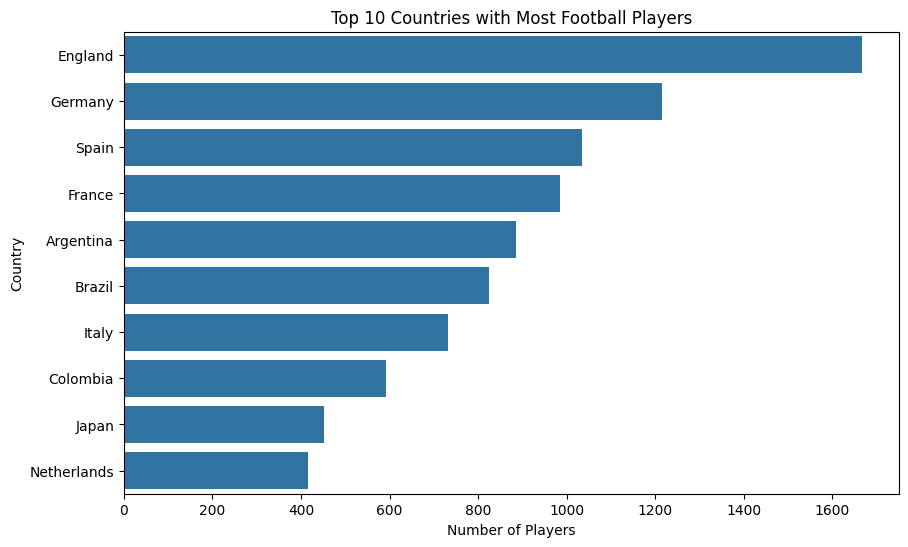

In [141]:
# Top 10 countries with most players
top_countries = df['nationality'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Football Players")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()

In [142]:
num_stats = pd.DataFrame({
    "Mean": df[num].mean(),
    "Median": df[num].median(),
    "Std_Dev": df[num].std(),
    "Skewness": df[num].skew()
})

num_stats


Mean     Median       Std_Dev  Skewness
age                         2.528329e+01       25.0  4.656964e+00  0.380620
height_cm                   1.813622e+02      181.0  6.756961e+00 -0.038197
weight_kg                   7.527634e+01       75.0  7.047744e+00  0.220802
overall                     6.624499e+01       66.0  6.949953e+00  0.070893
potential                   7.154689e+01       71.0  6.139669e+00  0.249941
value_eur                   2.484038e+06   700000.0  5.585481e+06  6.425941
wage_eur                    9.456943e+03     3000.0  2.135171e+04  7.821096
international_reputation    1.103184e+00        1.0  3.788605e-01  4.296515
weak_foot                   2.944250e+00        3.0  6.646562e-01  0.162986
skill_moves                 2.368038e+00        2.0  7.650376e-01  0.173640
release_clause_eur          4.740717e+06  1200000.0  1.103002e+07  6.460916
team_jersey_number          2.010389e+01       17.0  1.660364e+01  2.126464
contract_valid_until        2.021115e+03     2021.0  1.289888e+00  0.505437
pace                        6.770090e+01       69.0  1.129766e+01 -0.547591
shooting                    5.229830e+01       54.0  1.402942e+01 -0.291508
passing                     5.723378e+01       58.0  1.040784e+01 -0.238299
dribbling                   6.253158e+01       64.0  1.028495e+01 -0.607985
defending                   5.155350e+01       56.0  1.641953e+01 -0.342479
physic                      6.487668e+01       66.0  9.760162e+00 -0.485430
attacking_crossing          4.971840e+01       54.0  1.832540e+01 -0.604843
attacking_finishing         4.559022e+01       49.0  1.959461e+01 -0.316936
attacking_heading_accuracy  5.222147e+01       56.0  1.742843e+01 -0.880933
attacking_short_passing     5.874800e+01       62.0  1.467965e+01 -1.136213
attacking_volleys           4.280939e+01       44.0  1.770182e+01 -0.156466
skill_dribbling             5.559651e+01       61.0  1.892912e+01 -1.117592
skill_curve                 4.732569e+01       49.0  1.842299e+01 -0.263100
skill_fk_accuracy           4.270888e+01       41.0  1.743361e+01  0.094116
skill_long_passing          5.276885e+01       56.0  1.524645e+01 -0.590371
skill_ball_control          5.846198e+01       63.0  1.674188e+01 -1.290295
movement_acceleration       6.429992e+01       67.0  1.504223e+01 -0.811448
movement_sprint_speed       6.441575e+01       67.0  1.484776e+01 -0.848932
movement_agility            6.350492e+01       66.0  1.480838e+01 -0.634513
movement_reactions          6.175254e+01       62.0  9.135613e+00 -0.134748
movement_balance            6.385644e+01       66.0  1.420156e+01 -0.591586
power_shot_power            5.818169e+01       59.0  1.332608e+01 -0.270911
power_jumping               6.492817e+01       66.0  1.193406e+01 -0.450799
power_stamina               6.288948e+01       66.0  1.601795e+01 -0.887007
power_strength              6.523476e+01       66.0  1.253481e+01 -0.444035
power_long_shots            4.681294e+01       51.0  1.932234e+01 -0.428345
mentality_aggression        5.574215e+01       58.0  1.731816e+01 -0.425116
mentality_interceptions     4.638024e+01       52.0  2.077581e+01 -0.266102
mentality_positioning       5.007216e+01       55.0  1.959402e+01 -0.750469
mentality_vision            5.360975e+01       55.0  1.395563e+01 -0.358395
mentality_penalties         4.838336e+01       49.0  1.570810e+01 -0.359754
mentality_composure         5.852878e+01       60.0  1.188084e+01 -0.463889
defending_marking           4.684889e+01       52.0  2.009129e+01 -0.346061
defending_standing_tackle   4.764033e+01       55.0  2.158564e+01 -0.342587
defending_sliding_tackle    4.560663e+01       52.0  2.121773e+01 -0.274158
goalkeeping_diving          1.657277e+01       11.0  1.773807e+01  2.442975
goalkeeping_handling        1.635485e+01       11.0  1.699693e+01  2.429536
goalkeeping_kicking         1.621293e+01       11.0  1.661366e+01  2.432850
goalkeeping_positioning     1.636804e+01       11.0  1.713650e+01  2.460666
goalkeep

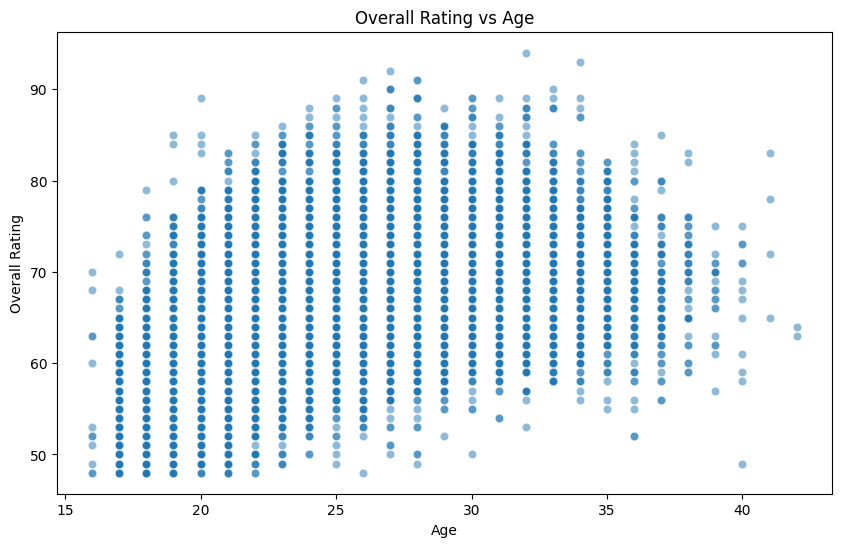

In [145]:
#Distribution of Overall Rating vs Age

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['age'], y=df['overall'], alpha=0.5)
plt.title("Overall Rating vs Age")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()

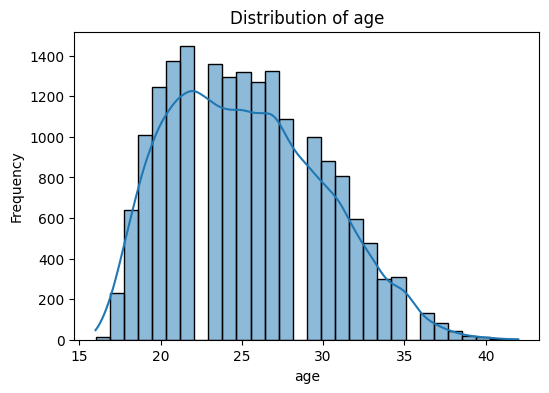

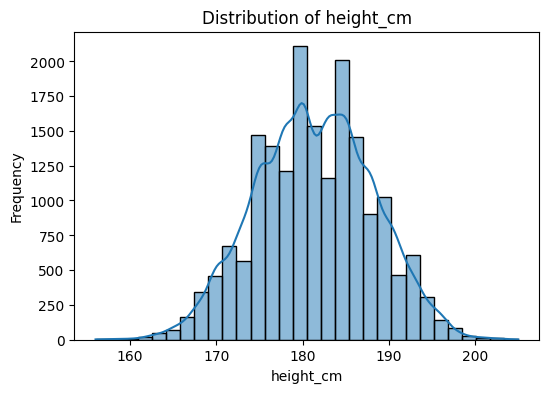

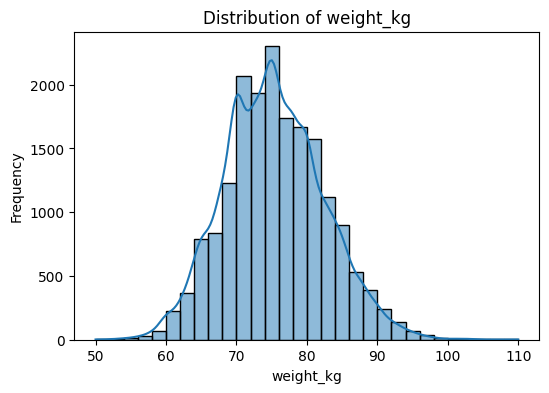

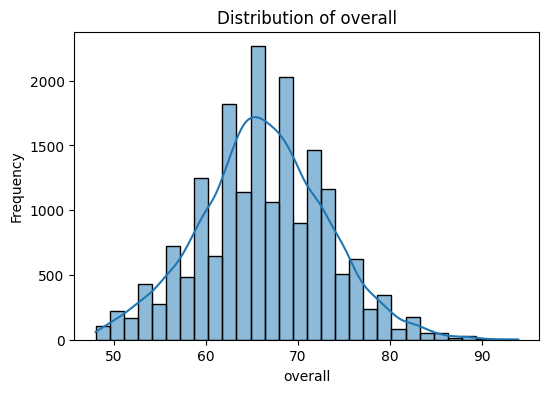

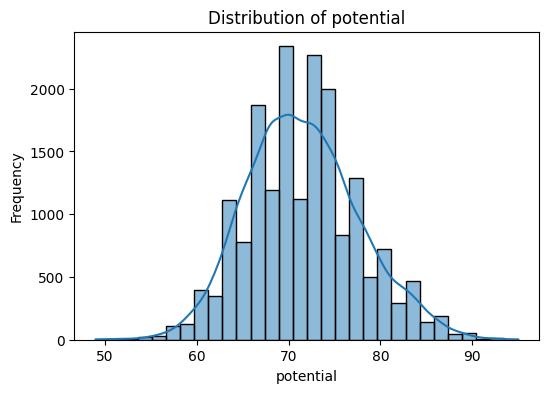

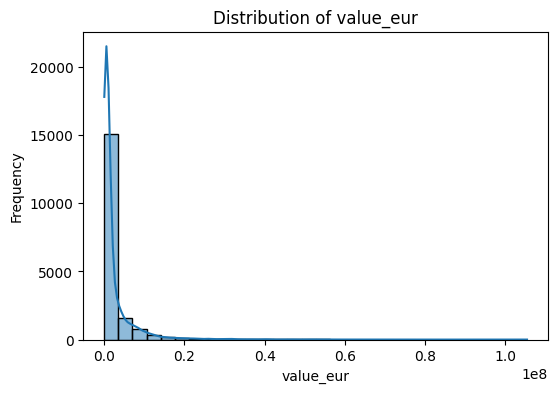

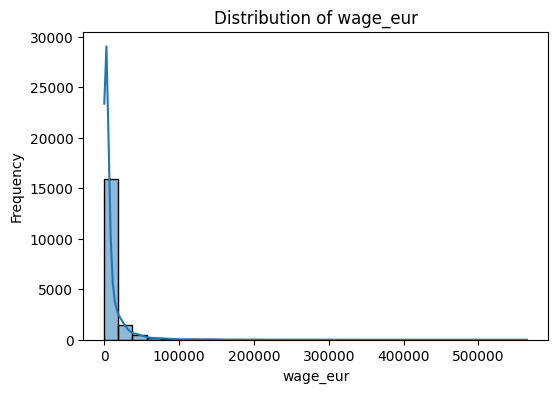

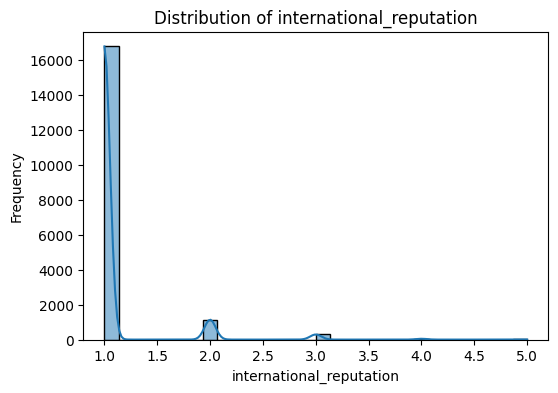

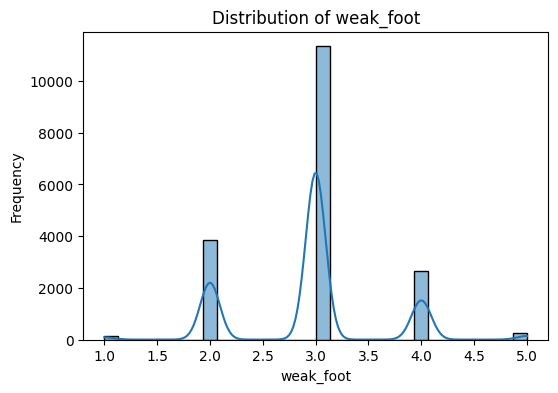

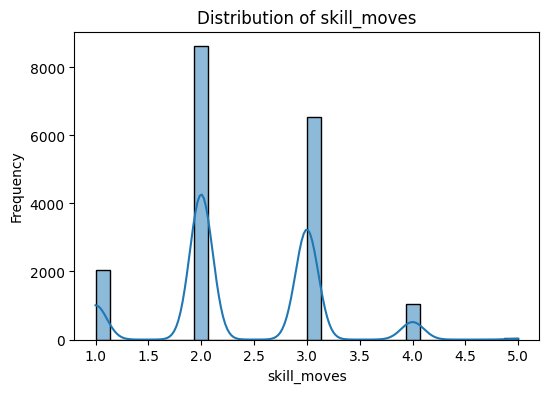

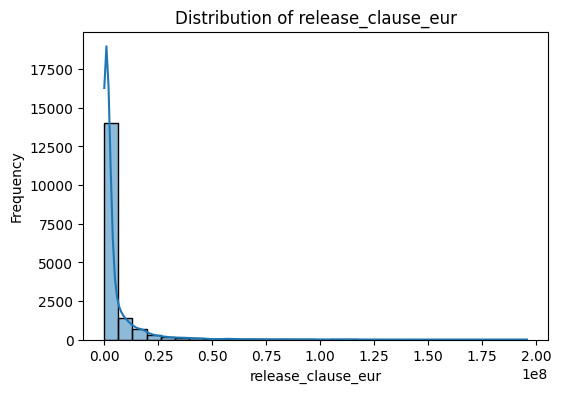

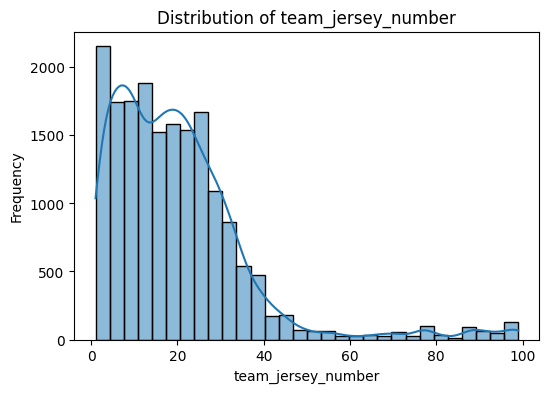

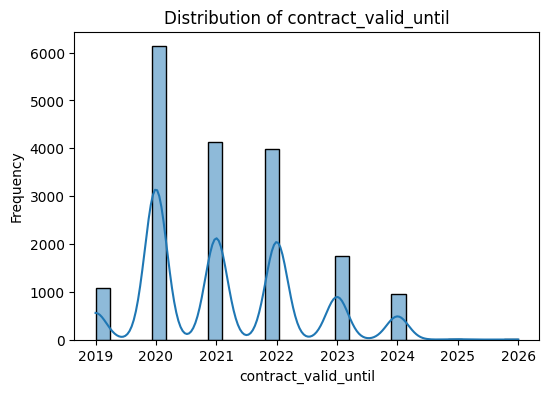

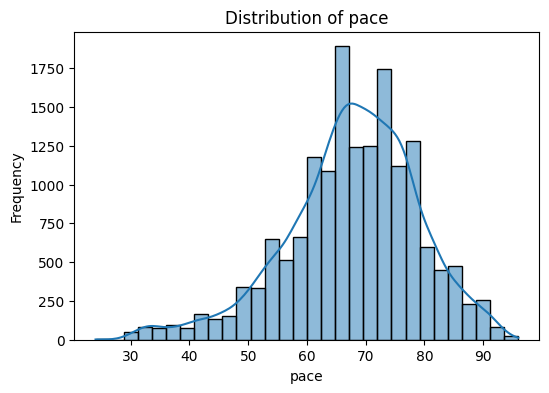

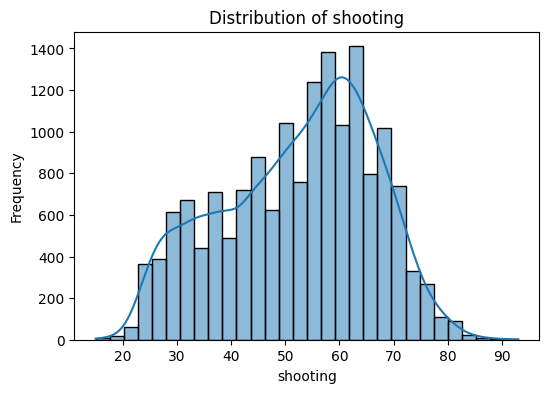

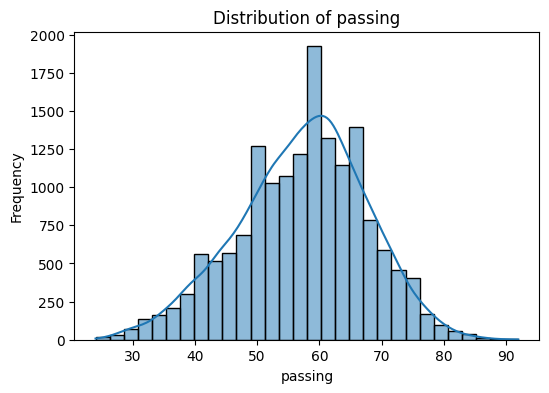

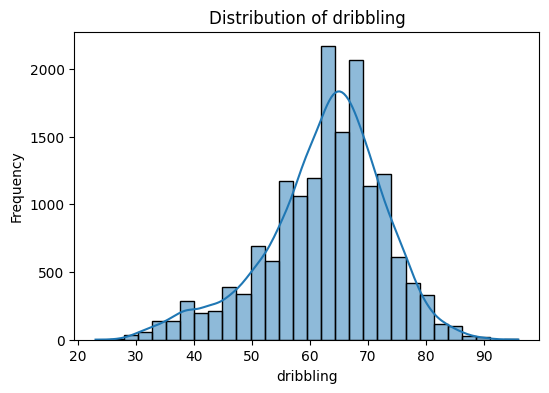

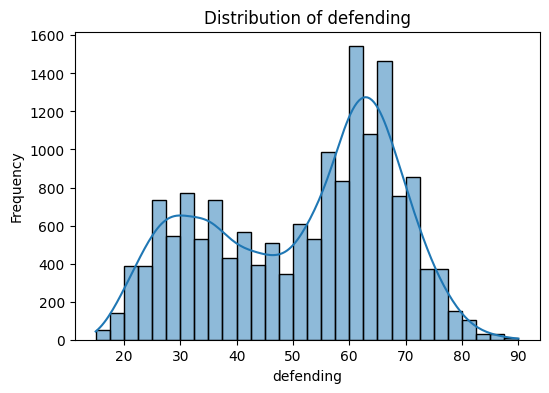

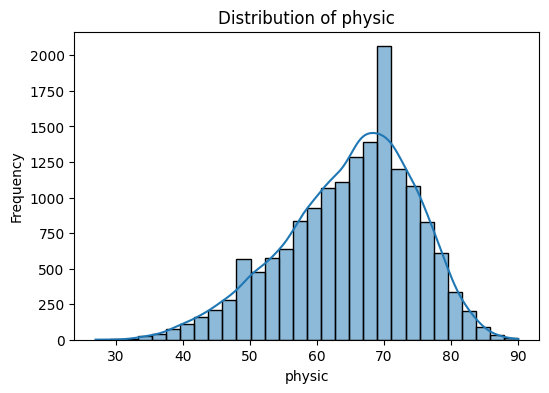

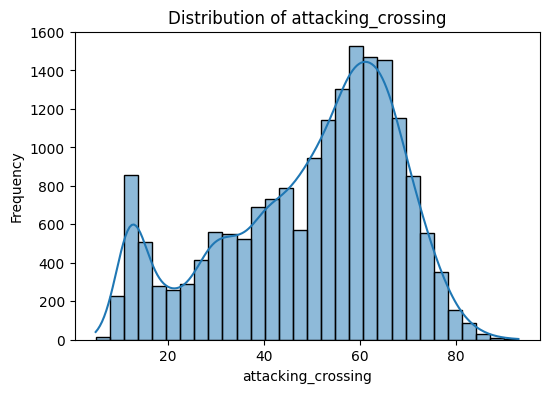

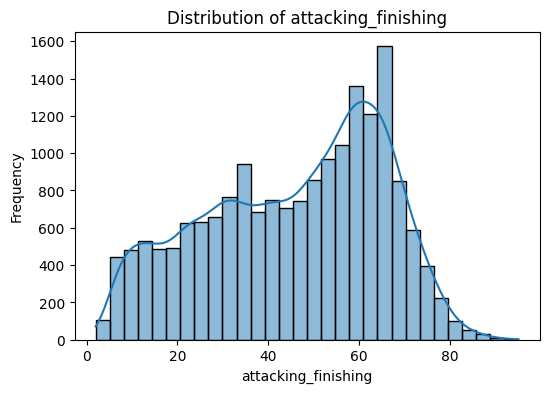

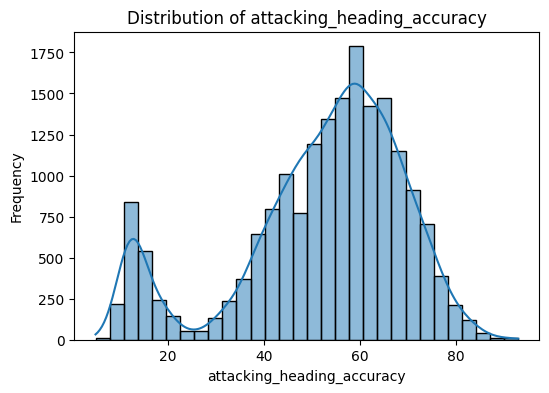

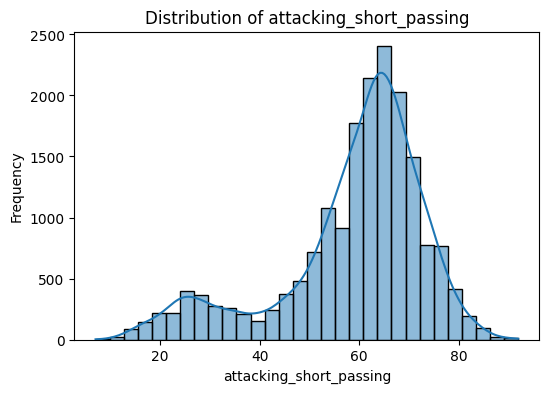

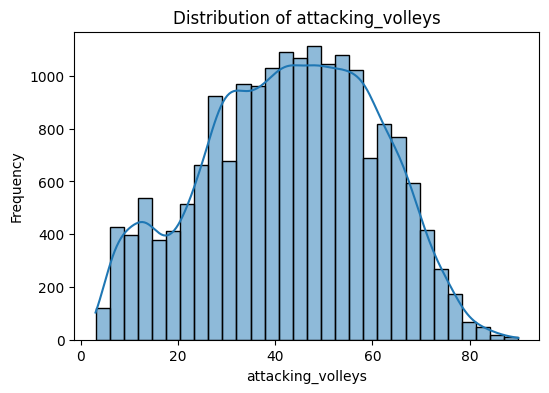

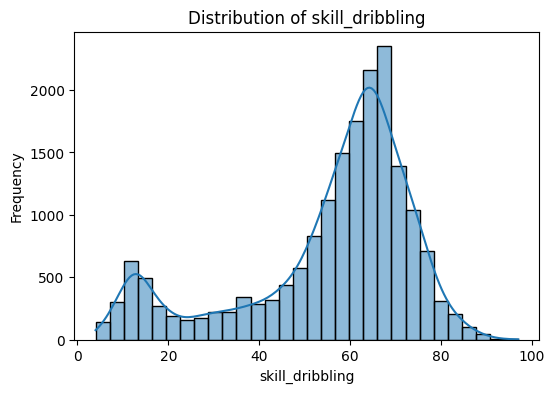

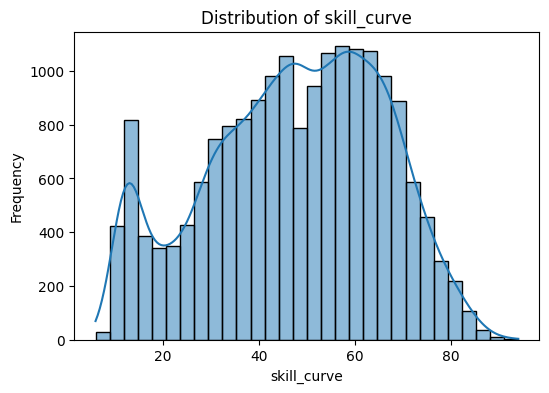

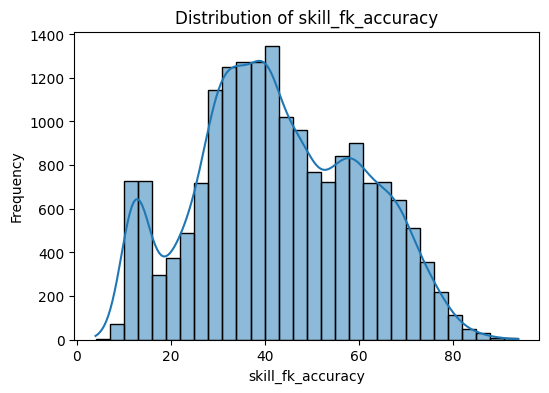

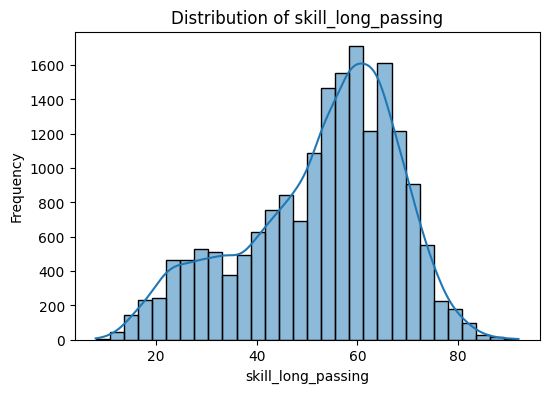

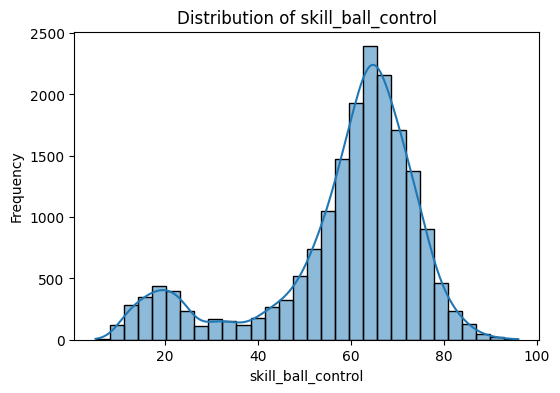

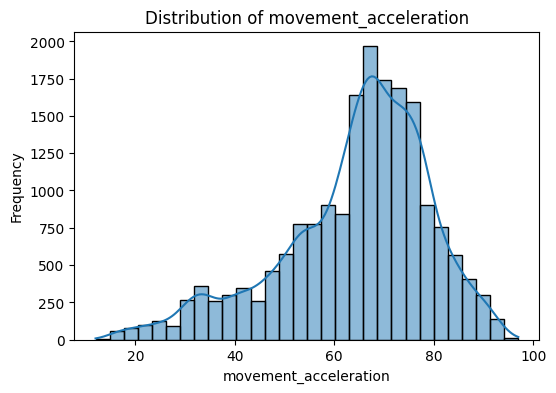

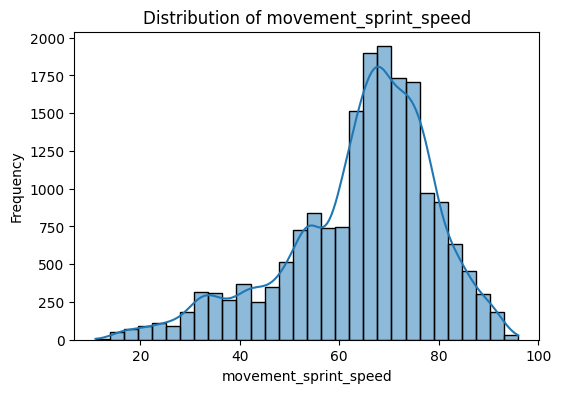

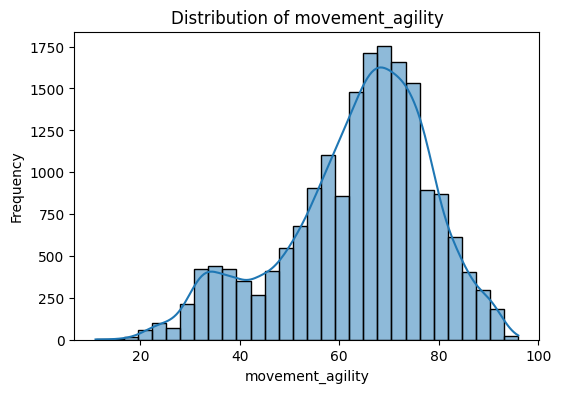

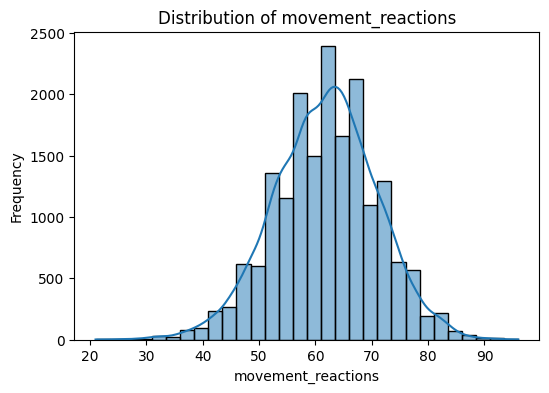

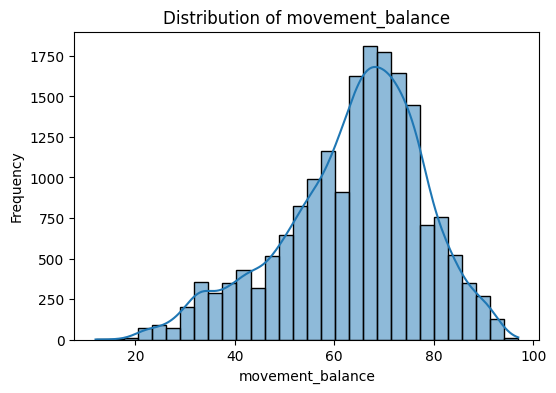

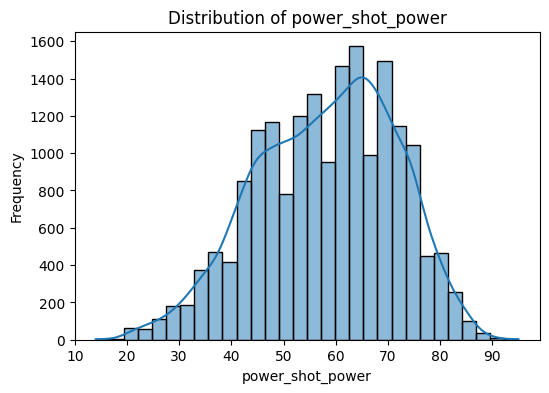

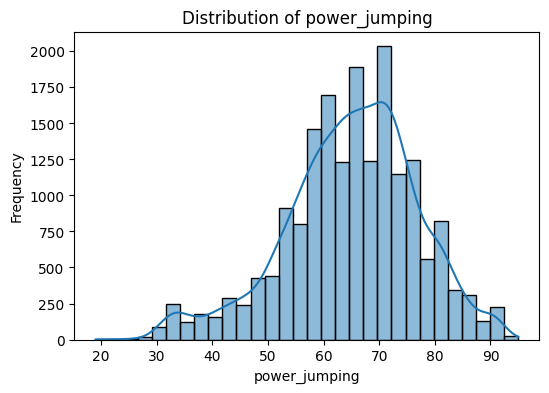

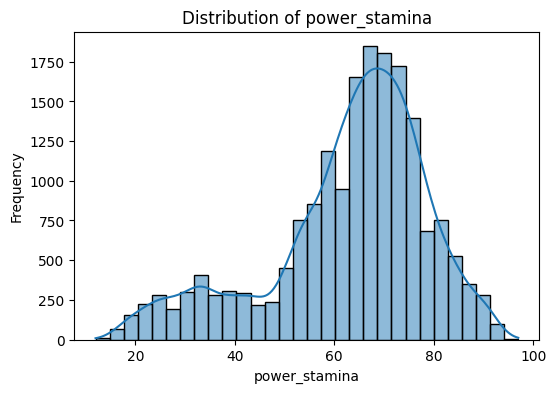

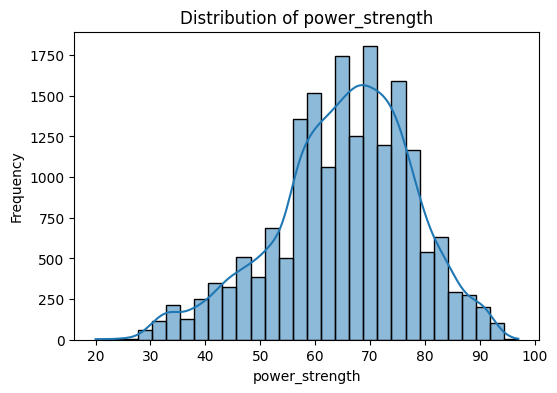

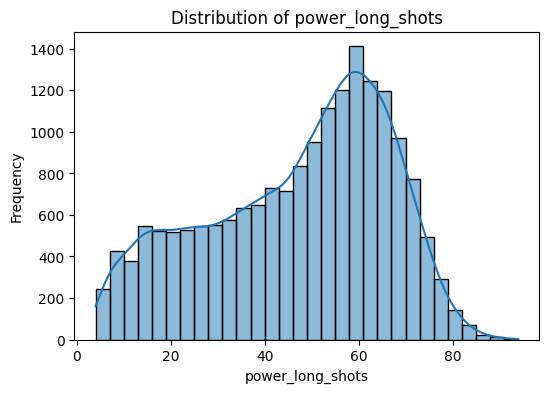

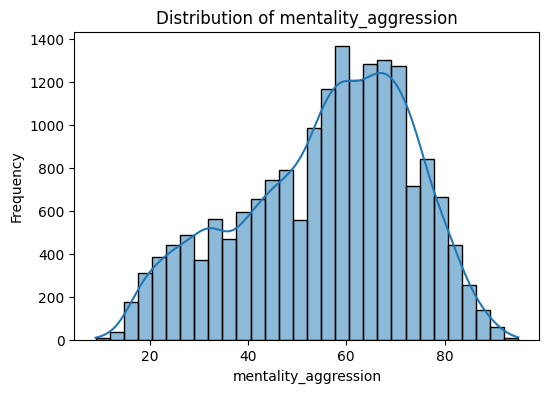

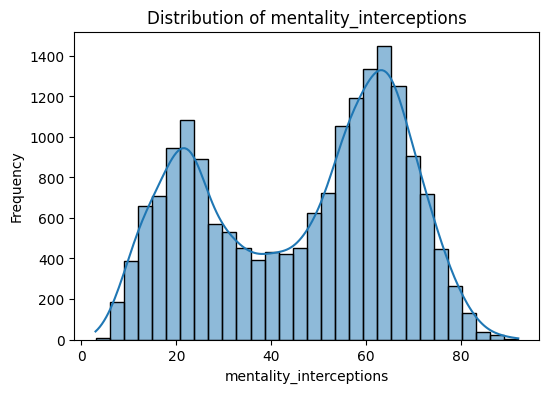

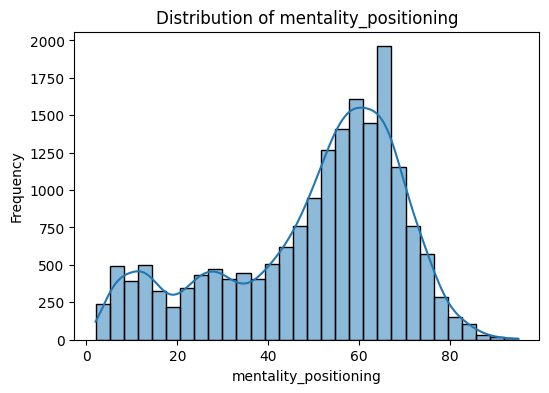

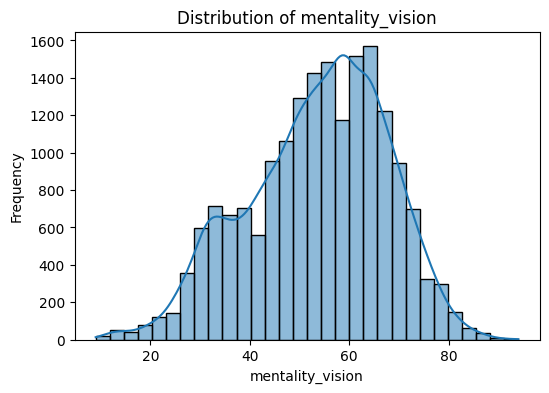

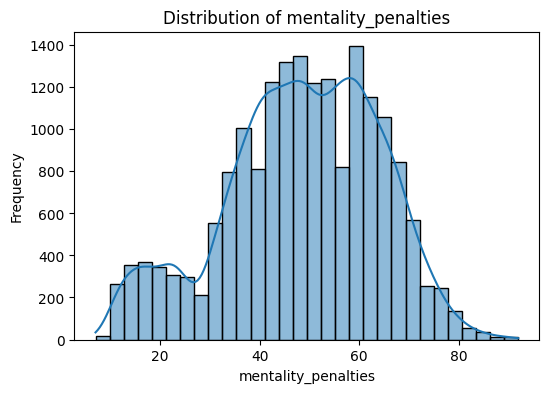

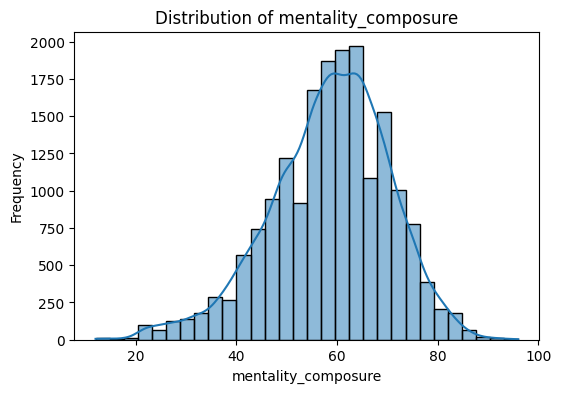

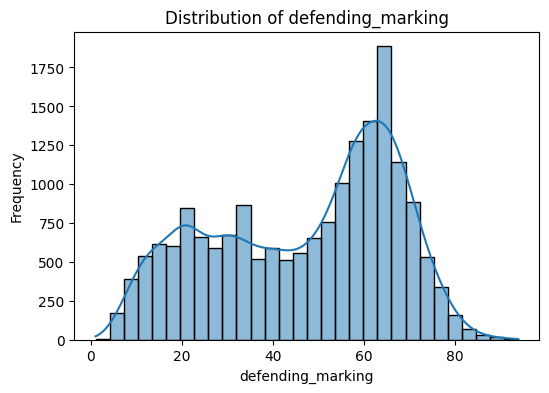

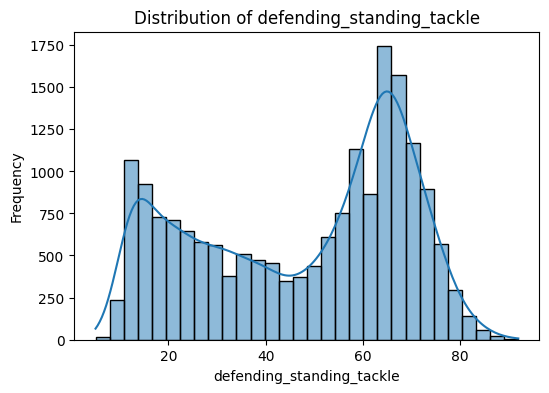

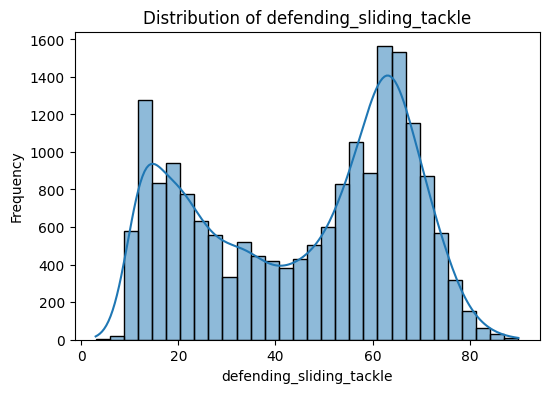

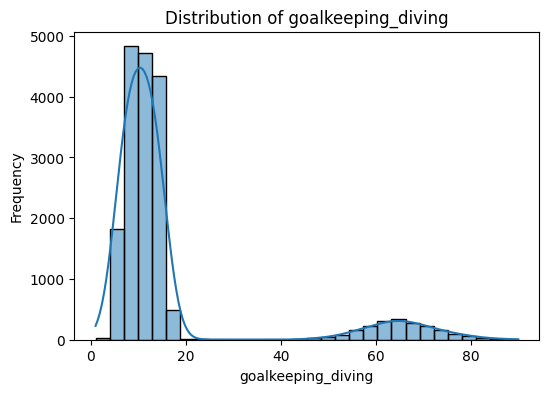

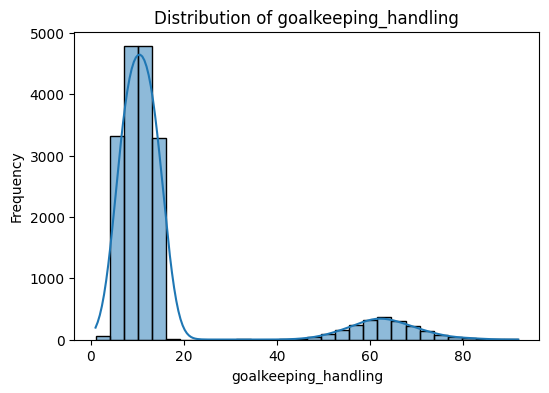

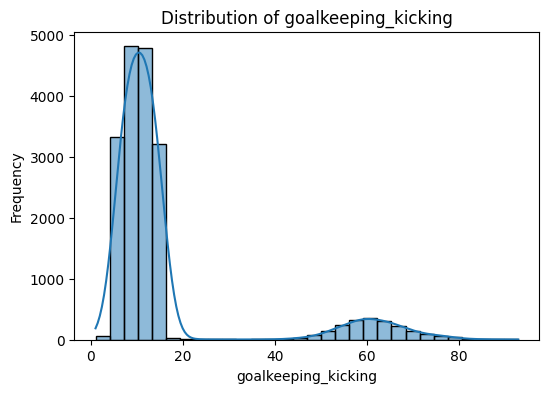

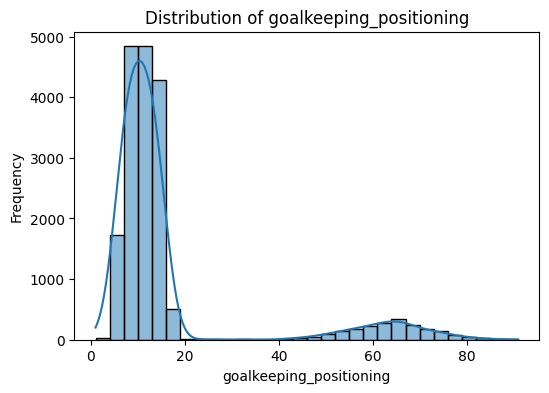

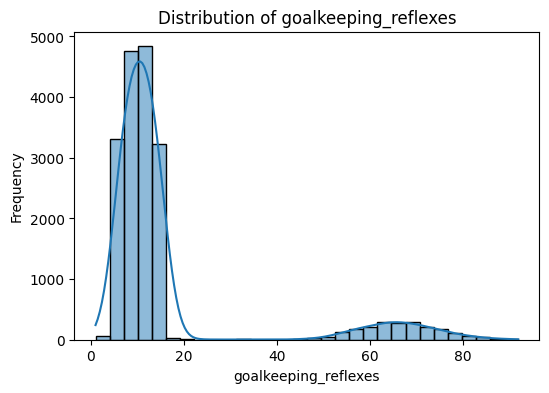

In [30]:
# Distribution plot for each Numerical columns
for col in num:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [31]:
# calculates the value range for each numerical feature
range_scale = pd.DataFrame({
    "min": df[num].min(),
    "max": df[num].max(),
    "Range": df[num].max() - df[num].min()
})
range_scale

min          max        Range
age                            16.0         42.0         26.0
height_cm                     156.0        205.0         49.0
weight_kg                      50.0        110.0         60.0
overall                        48.0         94.0         46.0
potential                      49.0         95.0         46.0
value_eur                       0.0  105500000.0  105500000.0
wage_eur                        0.0     565000.0     565000.0
international_reputation        1.0          5.0          4.0
weak_foot                       1.0          5.0          4.0
skill_moves                     1.0          5.0          4.0
release_clause_eur          13000.0  195800000.0  195787000.0
team_jersey_number              1.0         99.0         98.0
contract_valid_until         2019.0       2026.0          7.0
pace                           24.0         96.0         72.0
shooting                       15.0         93.0         78.0
passing                        24.0         92.0         68.0
dribbling                      23.0         96.0         73.0
defending                      15.0         90.0         75.0
physic                         27.0         90.0         63.0
attacking_crossing              5.0         93.0         88.0
attacking_finishing             2.0         95.0         93.0
attacking_heading_accuracy      5.0         93.0         88.0
attacking_short_passing         7.0         92.0         85.0
attacking_volleys               3.0         90.0         87.0
skill_dribbling                 4.0         97.0         93.0
skill_curve                     6.0         94.0         88.0
skill_fk_accuracy               4.0         94.0         90.0
skill_long_passing              8.0         92.0         84.0
skill_ball_control              5.0         96.0         91.0
movement_acceleration          12.0         97.0         85.0
movement_sprint_speed          11.0         96.0         85.0
movement_agility               11.0         96.0         85.0
movement_reactions             21.0         96.0         75.0
movement_balance               12.0         97.0         85.0
power_shot_power               14.0         95.0         81.0
power_jumping                  19.0         95.0         76.0
power_stamina                  12.0         97.0         85.0
power_strength                 20.0         97.0         77.0
power_long_shots                4.0         94.0         90.0
mentality_aggression            9.0         95.0         86.0
mentality_interceptions         3.0         92.0         89.0
mentality_positioning           2.0         95.0         93.0
mentality_vision                9.0         94.0         85.0
mentality_penalties             7.0         92.0         85.0
mentality_composure            12.0         96.0         84.0
defending_marking               1.0         94.0         93.0
defending_standing_tackle       5.0         92.0         87.0
defending_sliding_tackle        3.0         90.0         87.0
goalkeeping_diving              1.0         90.0         89.0
goalkeeping_handling            1.0         92.0         91.0
goalkeeping_kicking             1.0         93.0         92.0
goalkeeping_positioning         1.0         91.0         90.0
goalkeeping_reflexes            1.0         92.0         91.0

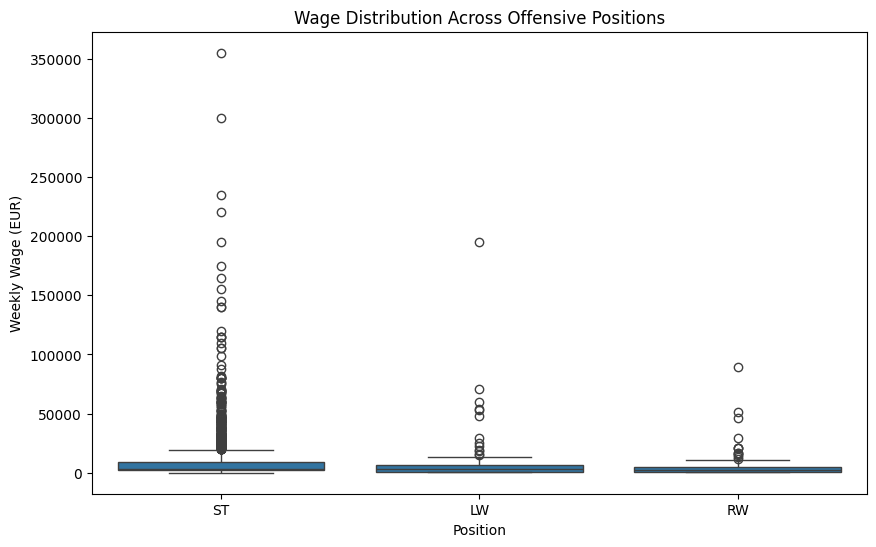

In [146]:
# offensive positions
offensive_positions = df[df['player_positions'].str.contains('ST|RW|LW', na=False)]

plt.figure(figsize=(10,6))
sns.boxplot(
    x='player_positions',
    y='wage_eur',
    data=offensive_positions[offensive_positions['player_positions'].isin(['ST', 'RW', 'LW'])]
)
plt.title("Wage Distribution Across Offensive Positions")
plt.xlabel("Position")
plt.ylabel("Weekly Wage (EUR)")
plt.show()


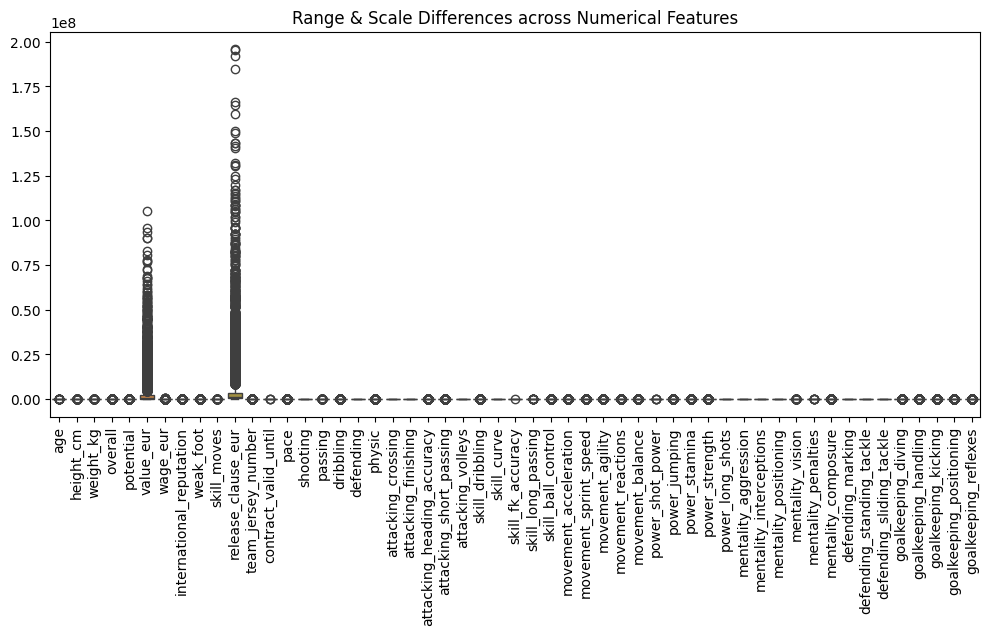

In [32]:
# visually compare their range, spread, and outliers

plt.figure(figsize=(12,5))
sns.boxplot(data= df[num])
plt.xticks(rotation= 90)
plt.title("Range & Scale Differences across Numerical Features")
plt.show()

In [33]:
# Unique Values for each Categorical Features
unique_df = pd.DataFrame({
    "unique_count": df[cat].nunique(),
    "unique_values": df[cat].apply(lambda x: x.unique())
})
unique_df

unique_count  \
short_name               17354   
long_name                18218   
dob                       6142   
nationality                162   
club                       698   
player_positions           643   
preferred_foot               2   
work_rate                    9   
body_type                   10   
real_face                    2   
team_position               29   
joined                    1760   
player_traits              921   
ls                          94   
st                          94   
rs                          94   
lw                         107   
lf                         103   
cf                         103   
rf                         103   
rw                         107   
lam                        103   
cam                        103   
ram                        103   
lm                         100   
lcm                         88   
cm                          88   
rcm                         88   
rm                         100   
lwb                         98   
ldm                         98   
cdm                         98   
rdm                         98   
rwb                         98   
lb                          96   
lcb                        110   
cb                         110   
rcb                        110   
rb                          96   

                                                      unique_values  
short_name        [L. Messi, Cristiano Ronaldo, Neymar Jr, J. Ob...  
long_name         [Lionel Andrés Messi Cuccittini, Cristiano Ron...  
dob               [1987-06-24, 1985-02-05, 1992-02-05, 1993-01-0...  
nationality       [Argentina, Portugal, Brazil, Slovenia, Belgiu...  
club              [FC Barcelona, Juventus, Paris Saint-Germain, ...  
player_positions  [RW, CF, ST, ST, LW, LW, CAM, GK, LW, CF, CAM,...  
preferred_foot                                        [Left, Right]  
work_rate         [Medium/Low, High/Low, High/Medium, Medium/Med...  
body_type         [Messi, C. Ronaldo, Neymar, Normal, Lean, PLAY...  
real_face                                                 [Yes, No]  
team_position     [RW, LW, CAM, GK, RCM, LCB, ST, CDM, LDM, RM, ...  
joined            [2004-07-01, 2018-07-10, 2017-08-03, 2014-07-1...  
player_traits     [Beat Offside Trap, Argues with Officials, Ear...  
ls                [89+2, 91+3, 84+3, nan, 83+3, 82+3, 69+3, 77+3...  
st                [89+2, 91+3, 84+3, nan, 83+3, 82+3, 69+3, 77+3...  
rs                [89+2, 91+3, 84+3, nan, 83+3, 82+3, 69+3, 77+3...  
lw                [93+2, 89+3, 90+3, nan, 87+3, 67+3, 84+3, 88+3...  
lf                [93+2, 90+3, 89+3, nan, 88+3, 87+3, 69+3, 83+3...  
cf                [93+2, 90+3, 89+3, nan, 88+3, 87+3, 69+3, 83+3...  
rf                [93+2, 90+3, 89+3, nan, 88+3, 87+3, 69+3, 83+3...  
rw                [93+2, 89+3, 90+3, nan, 87+3, 67+3, 84+3, 88+3...  
lam               [93+2, 88+3, 90+3, nan, 89+3, 69+3, 86+3, 87+3...  
cam               [93+2, 88+3, 90+3, nan, 89+3, 69+3, 86+3, 87+3...  
ram               [93+2, 88+3, 90+3, nan, 89+3, 69+3, 86+3, 87+3...  
lm                [92+2, 88+3, 89+3, nan, 69+3, 85+3, 87+3, 86+3...  
lcm               [87+2, 81+3, 82+3, nan, 83+3, 87+3, 74+3, 78+3...  
cm                [87+2, 81+3, 82+3, nan, 83+3, 87+3, 74+3, 78+3...  
rcm               [87+2, 81+3, 82+3, nan, 83+3, 87+3, 74+3, 78+3...  
rm                [92+2, 88+3, 89+3, nan, 69+3, 85+3, 87+3, 86+3...  
lwb               [68+2, 65+3, 66+3, nan, 77+3, 79+3, 81+3, 70+3...  
ldm               [66+2, 61+3, nan, 63+3, 77+3, 83+3, 81+3, 67+3...  
cdm               [66+2, 61+3, nan, 63+3, 77+3, 83+3, 81+3, 67+3...  
rdm               [66+2, 61+3, nan, 63+3, 77+3, 83+3, 81+3, 67+3...  
rwb               [68+2, 65+3, 66+3, nan, 77+3, 79+3, 81+3, 70+3...  
lb                [63+2, 61+3, nan, 73+3, 81+3, 79+3, 66+3, 63+3...  
lcb               [52+2, 53+3, 46+3, nan, 49+3, 66+3, 87+3, 72+3...  
cb                [52+2, 53+3, 46+3, nan, 49+3, 66+3, 87+3, 72+3...

In [34]:
# frequency distributions of categorical features

freq_dist = {}
for col in cat:
    freq_dist[col] = pd.DataFrame({
        "count": df[col].value_counts(),
        "percentage": df[col].value_counts(normalize=True)*100
    })
freq_dist[cat[0]]

count  percentage
short_name                        
J. Rodríguez        11    0.060182
Paulinho             9    0.049240
J. García            8    0.043768
J. Williams          7    0.038297
J. Hernández         7    0.038297
...                ...         ...
Sergio Busquets      1    0.005471
A. Griezmann         1    0.005471
P. Dybala            1    0.005471
P. Pogba             1    0.005471
J. Oblak             1    0.005471

[17354 rows x 2 columns]

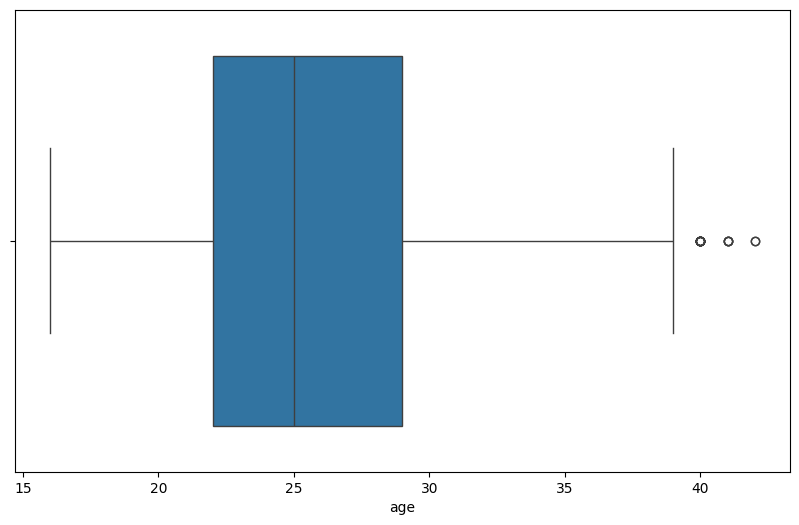

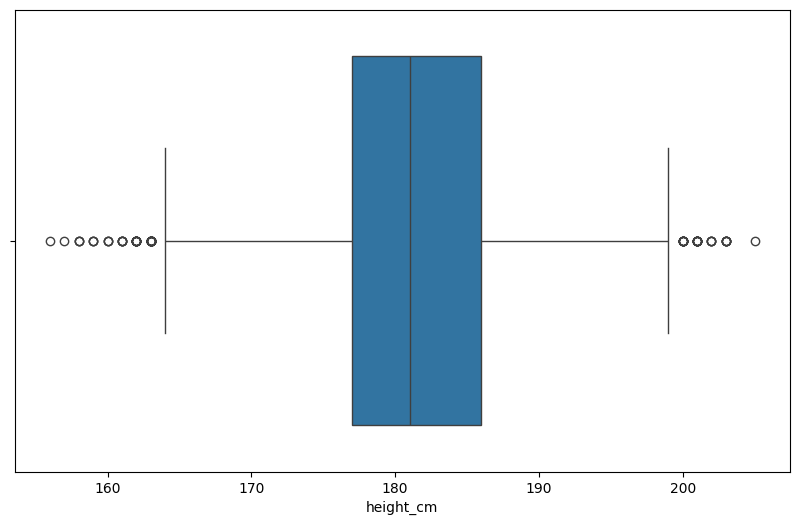

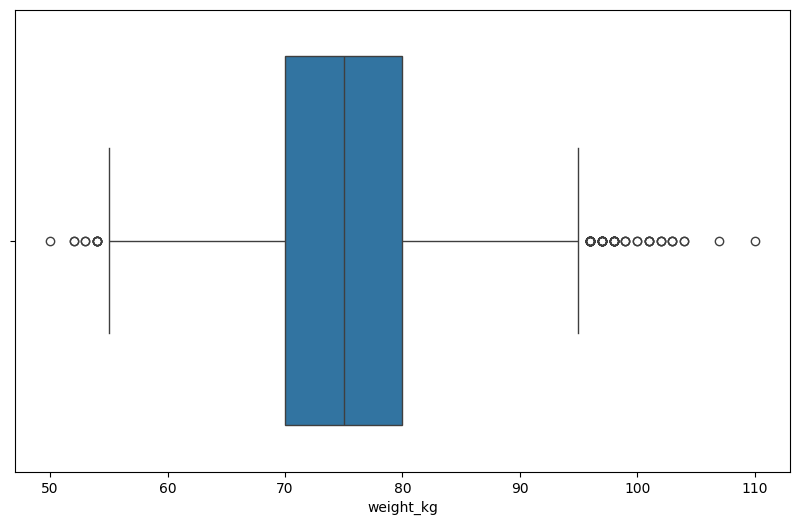

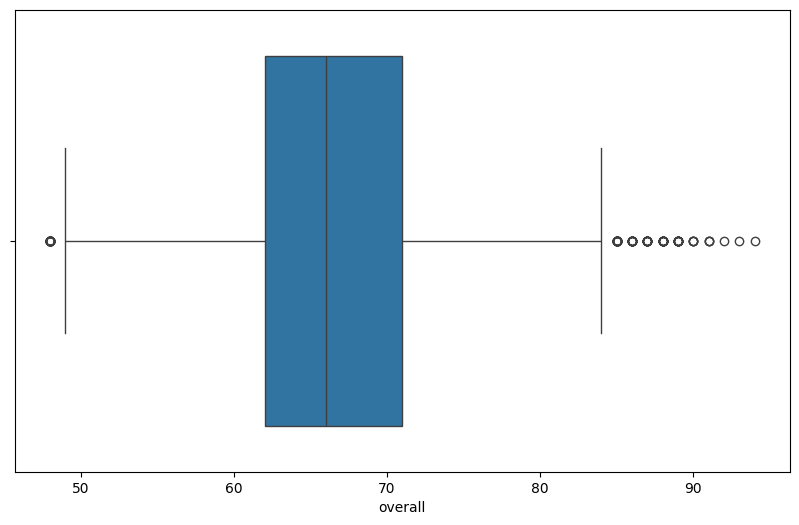

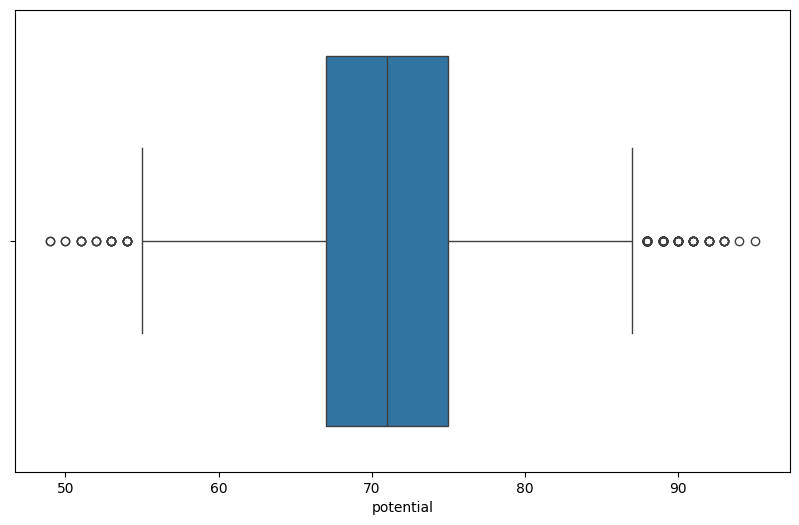

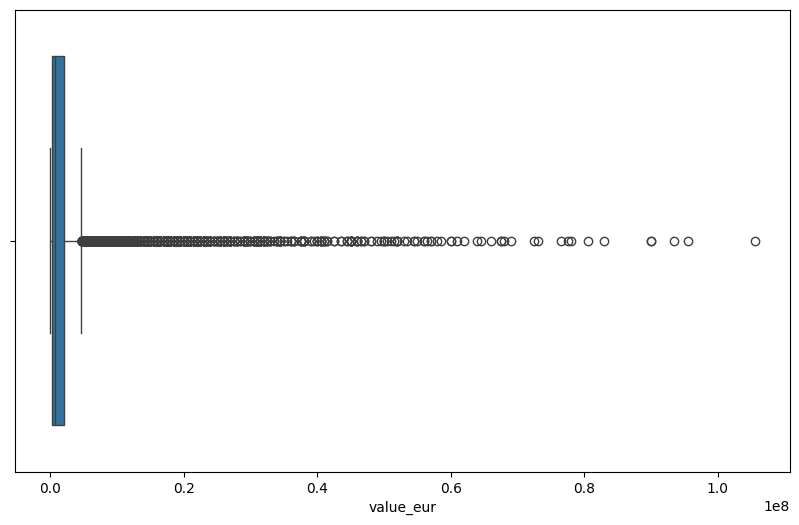

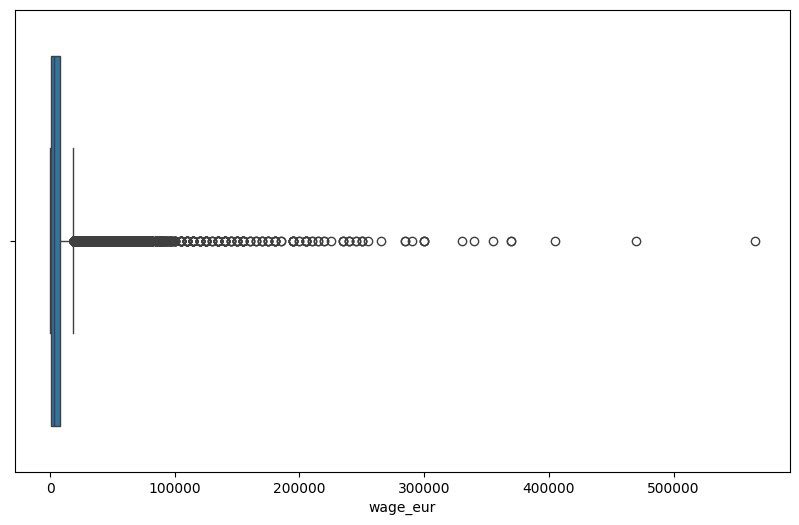

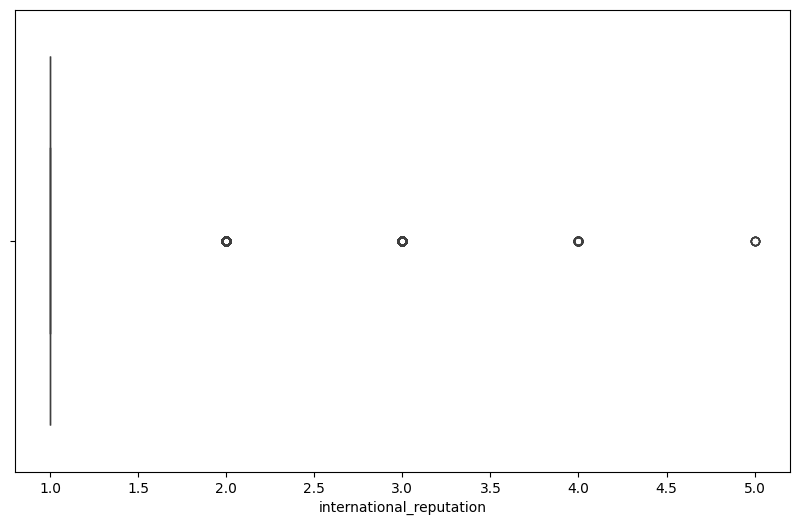

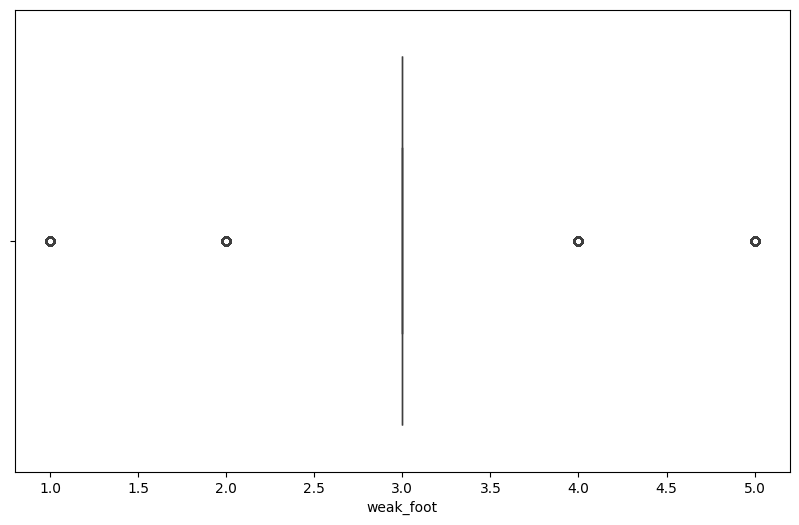

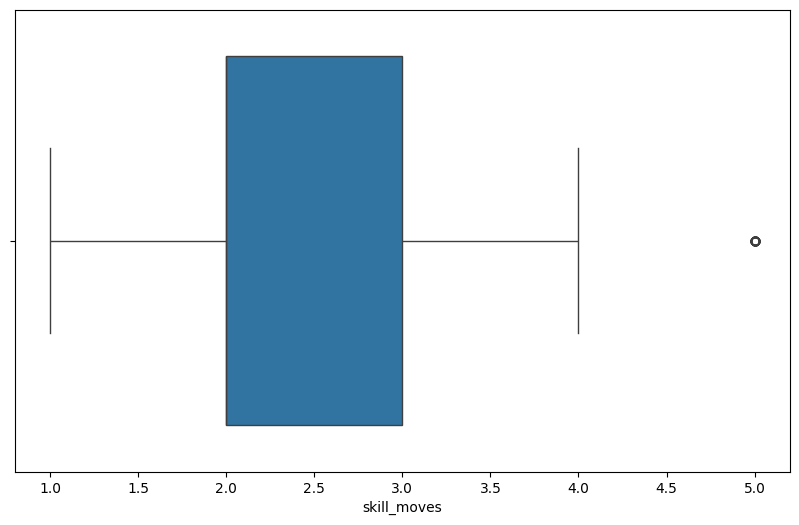

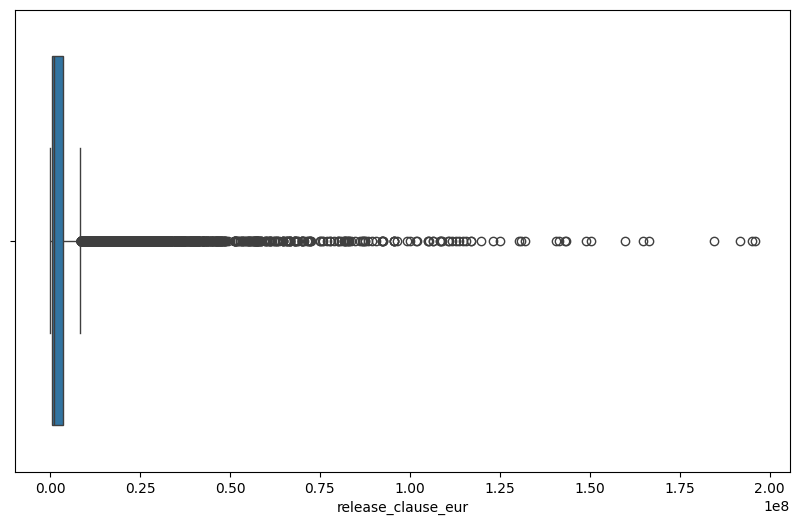

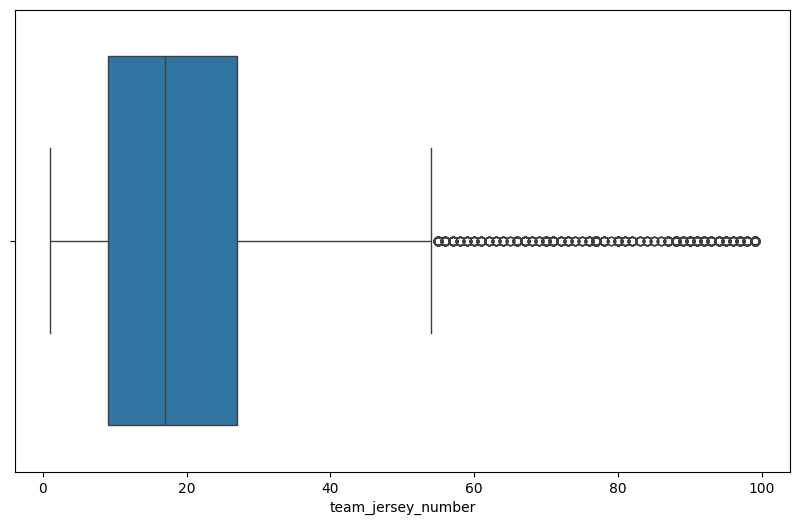

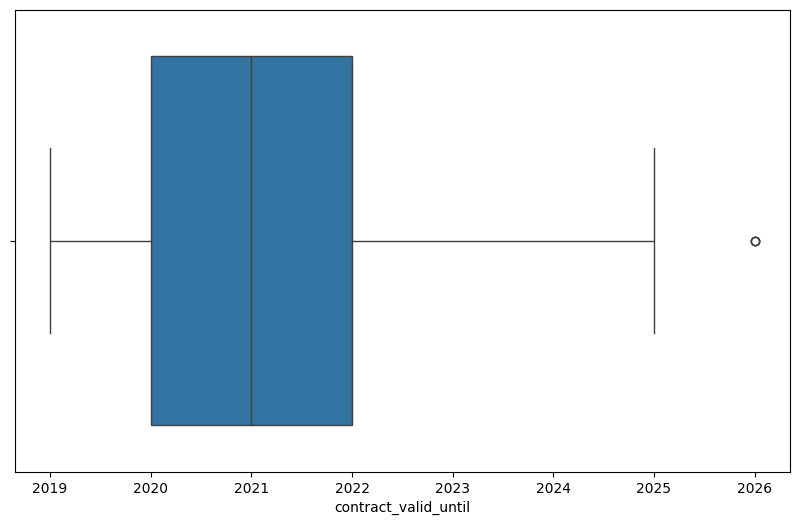

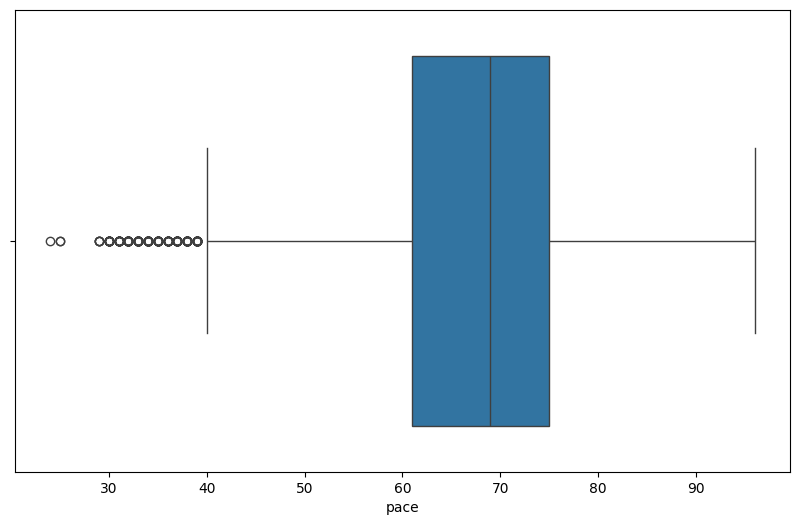

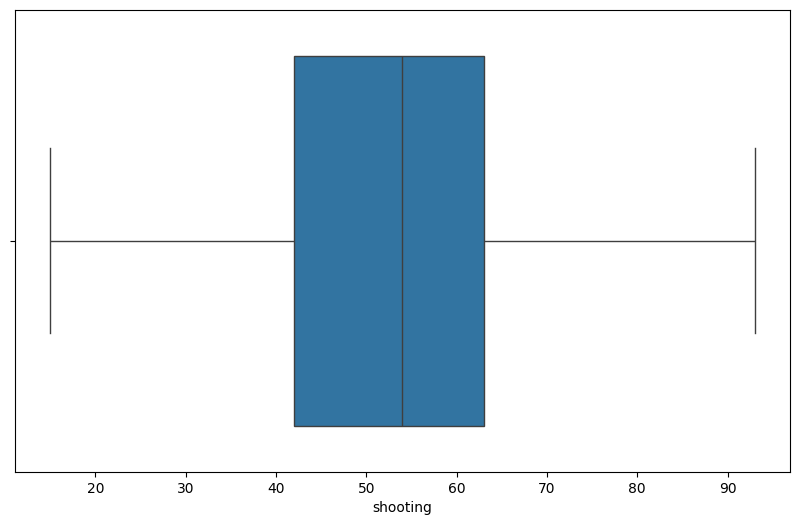

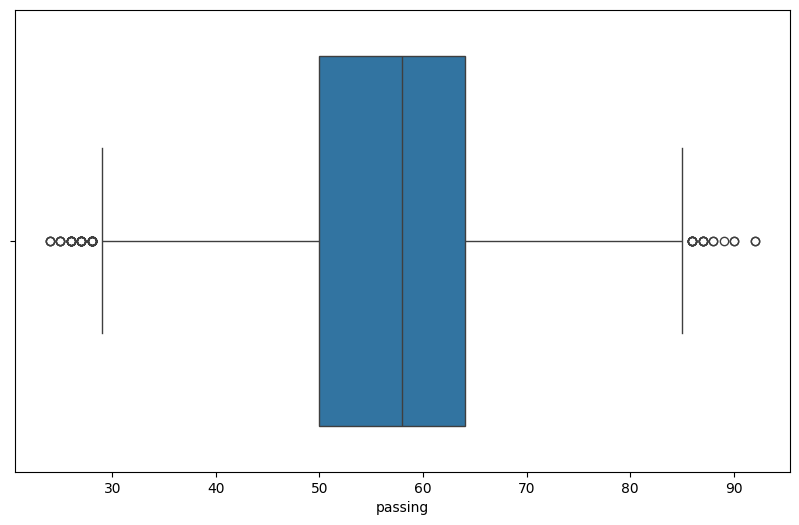

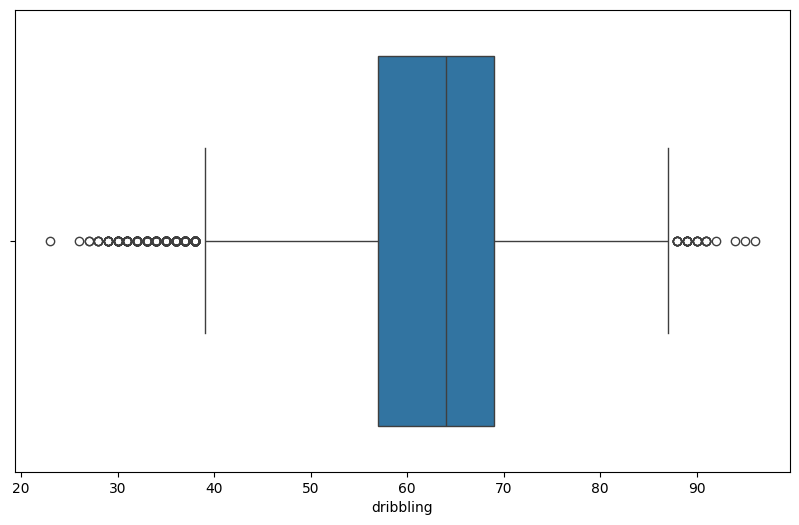

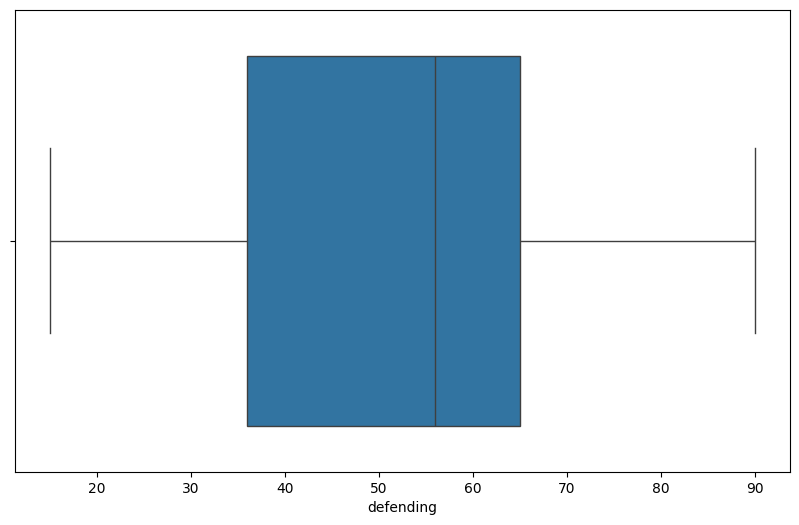

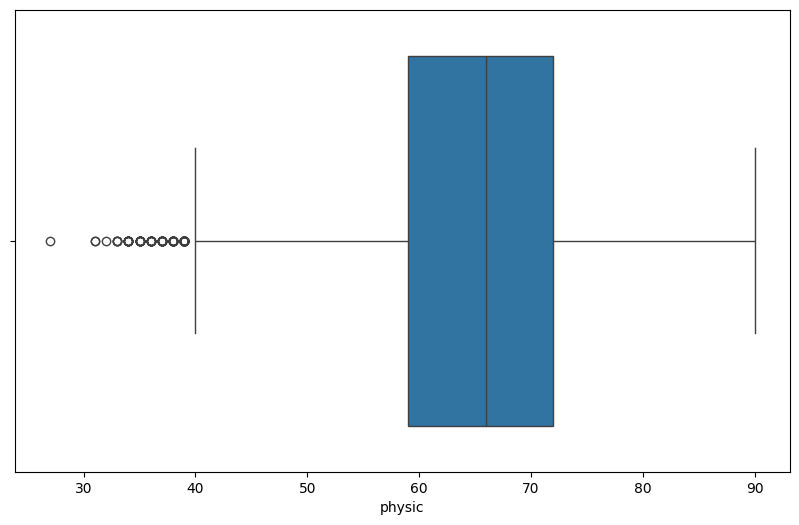

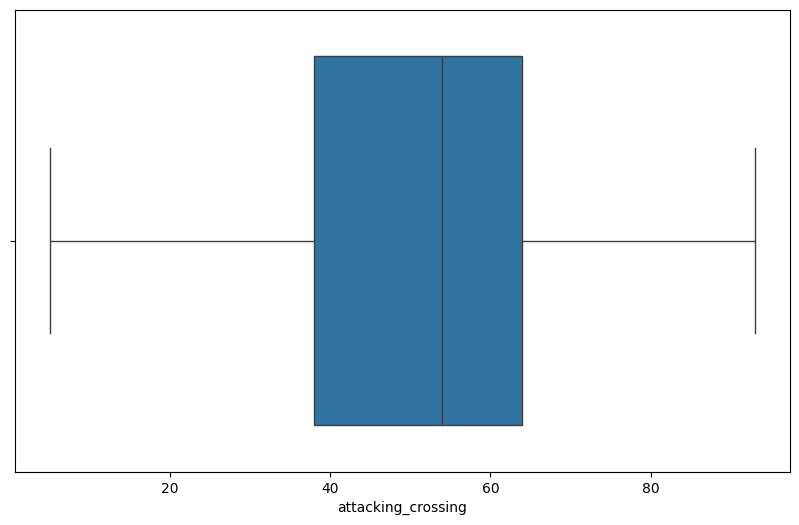

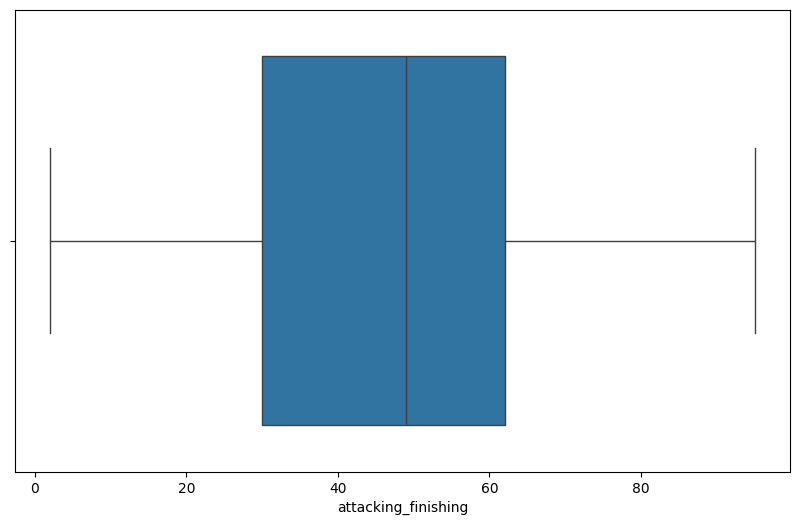

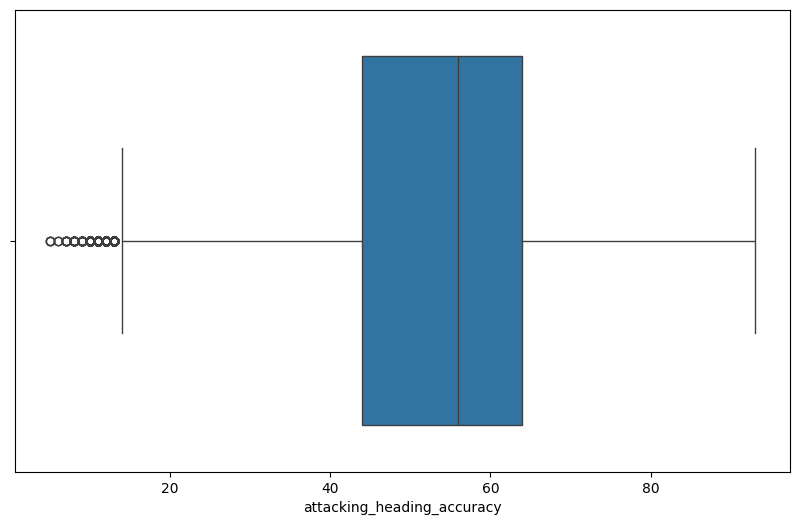

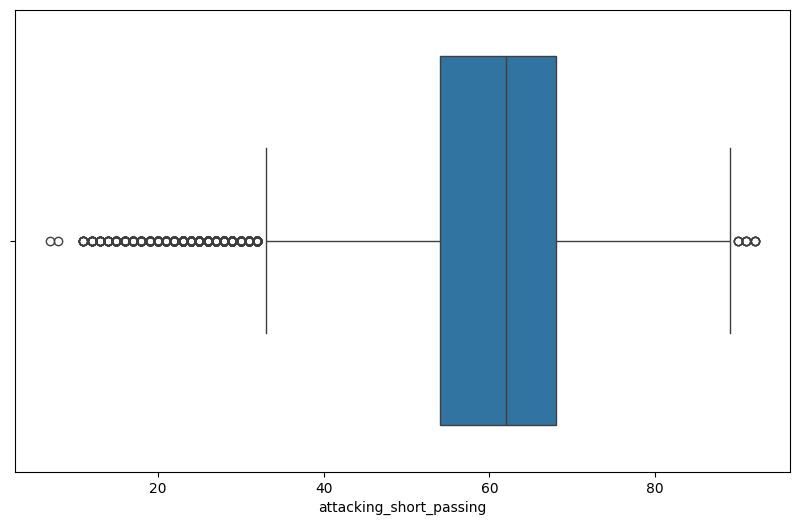

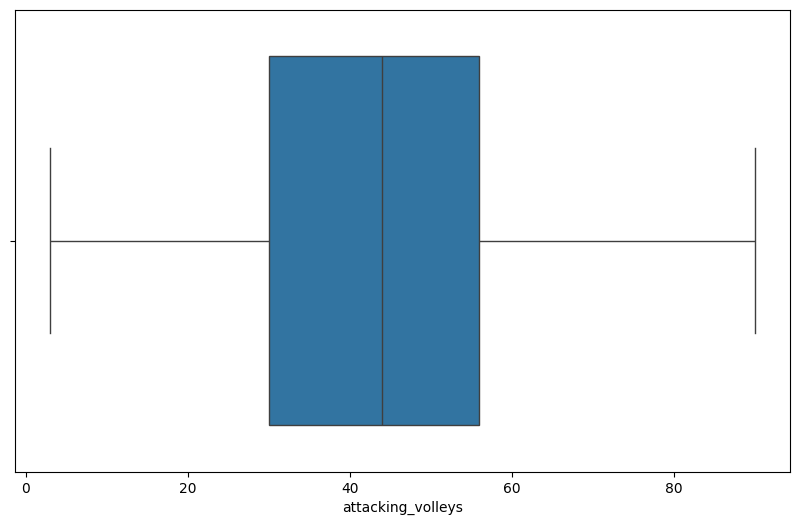

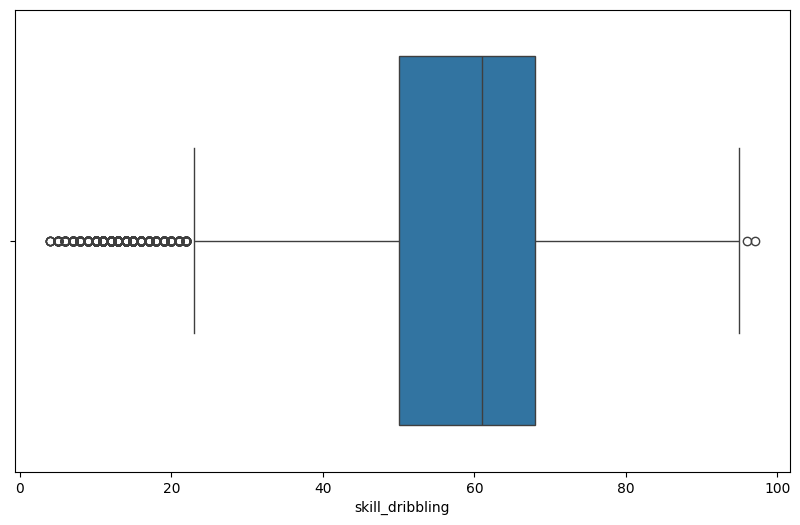

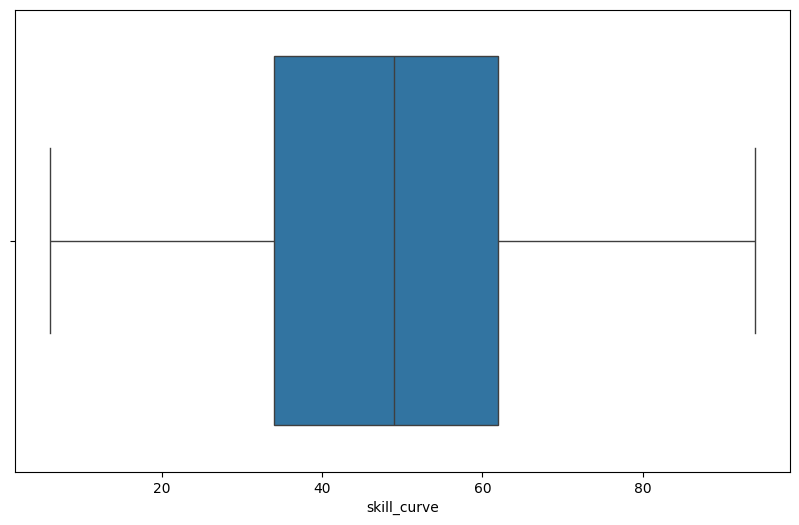

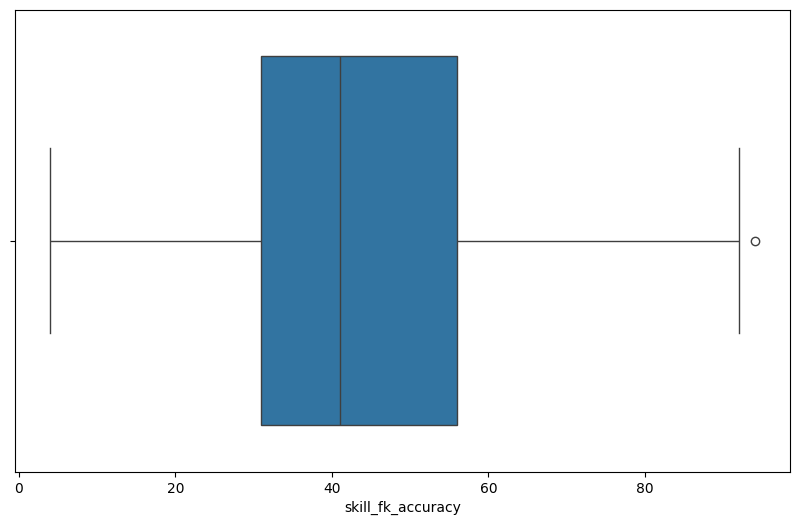

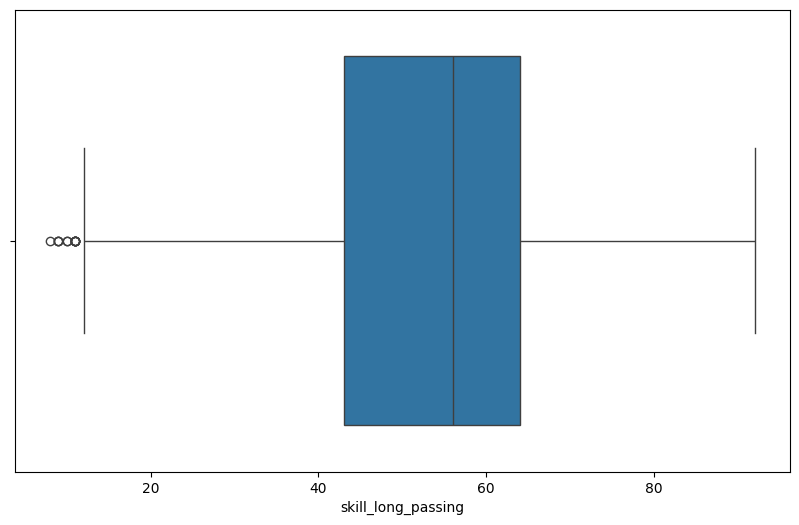

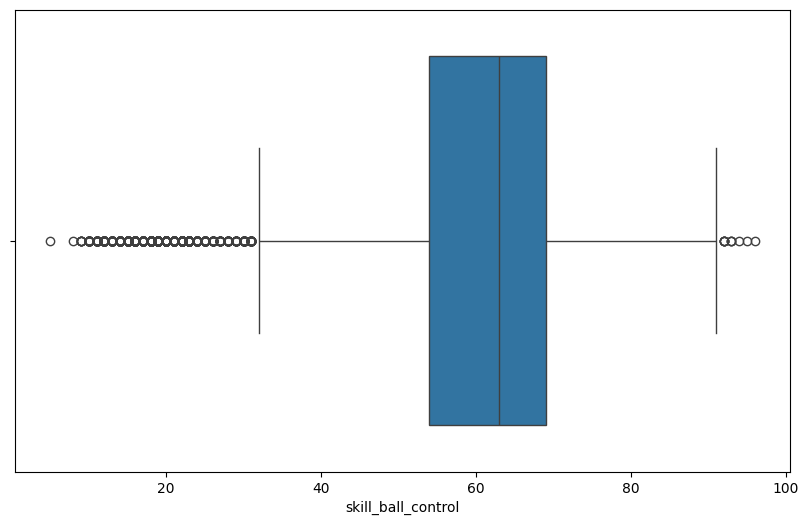

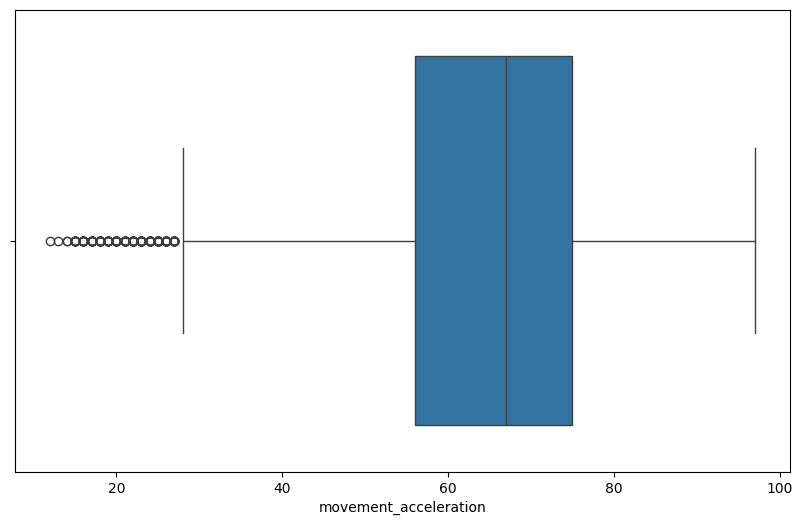

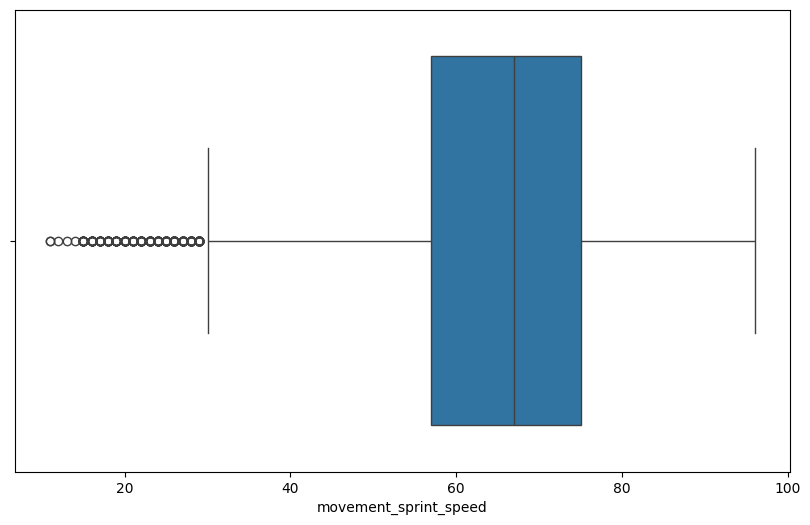

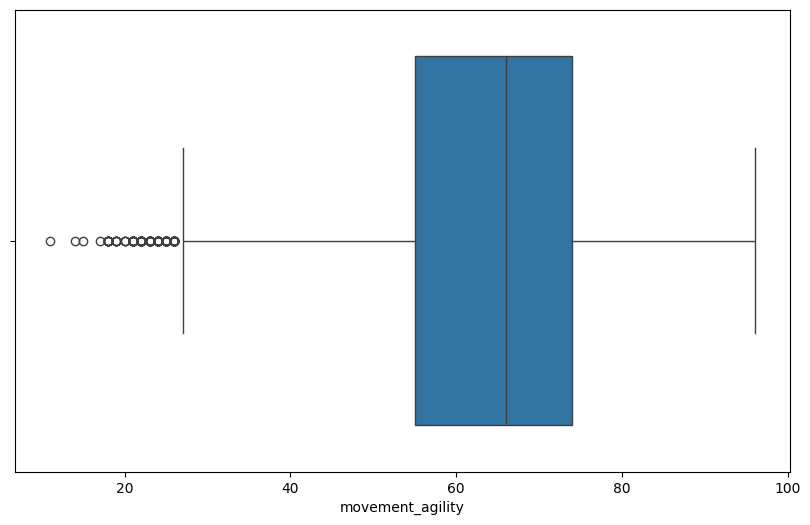

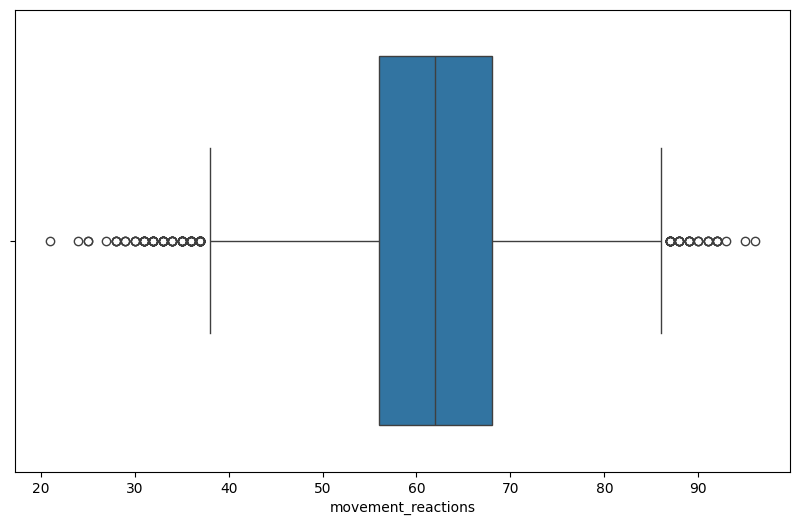

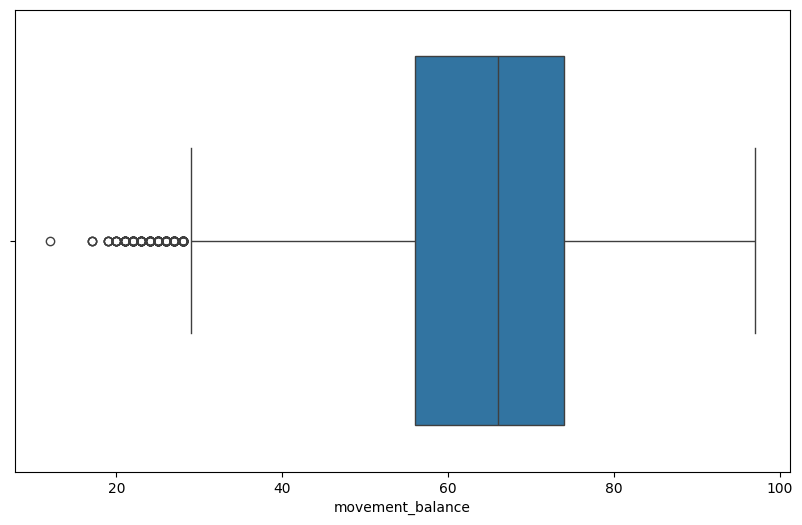

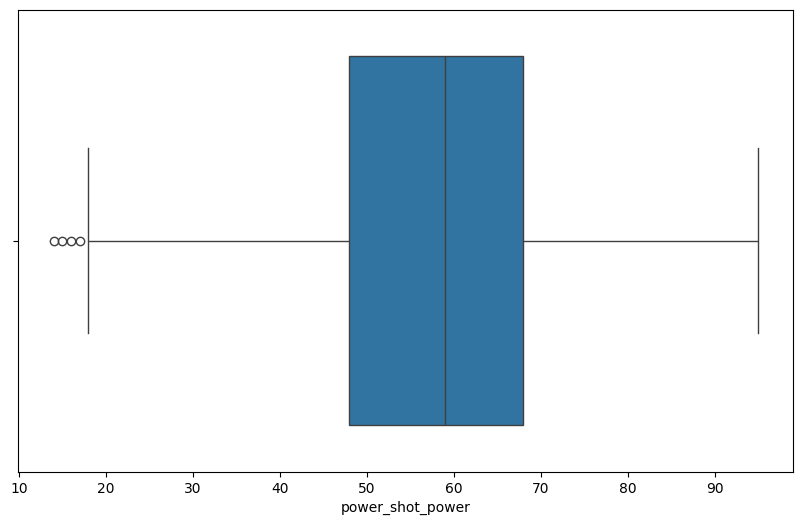

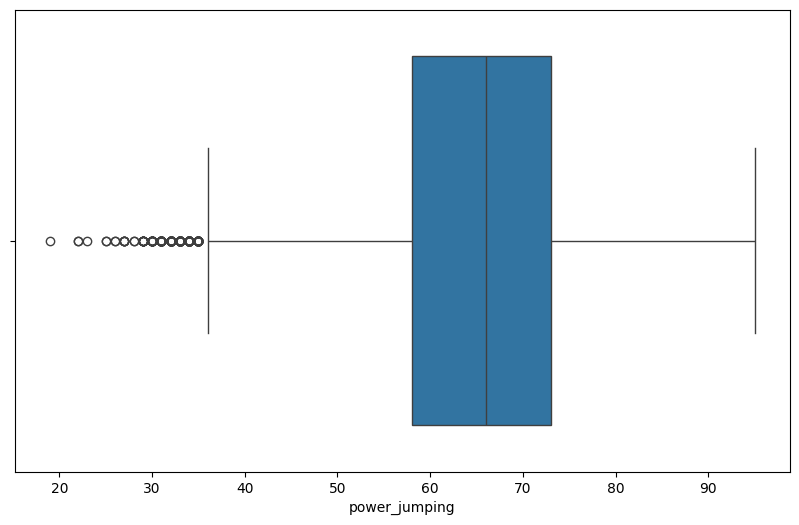

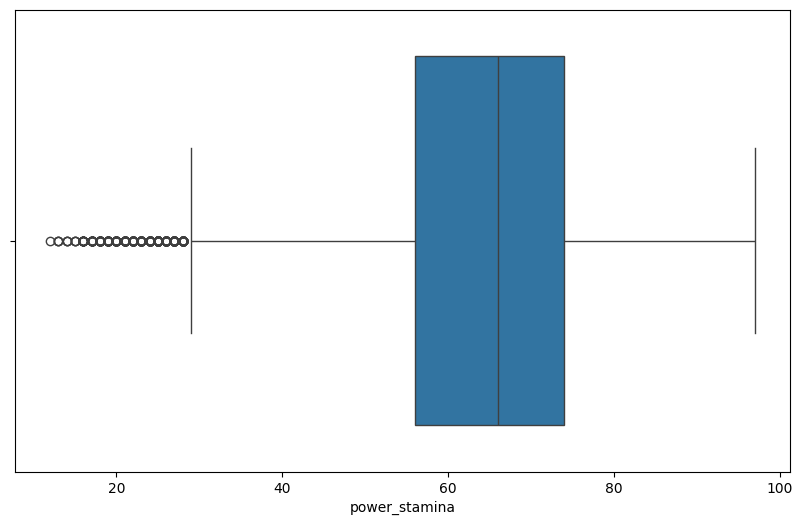

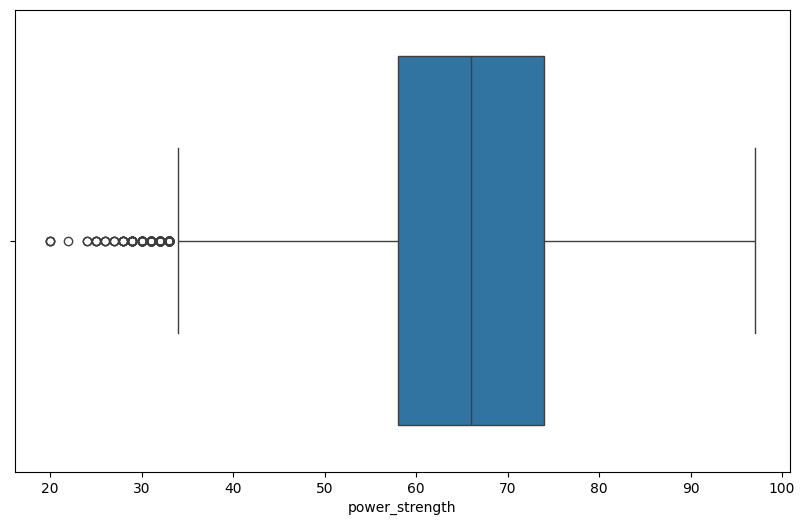

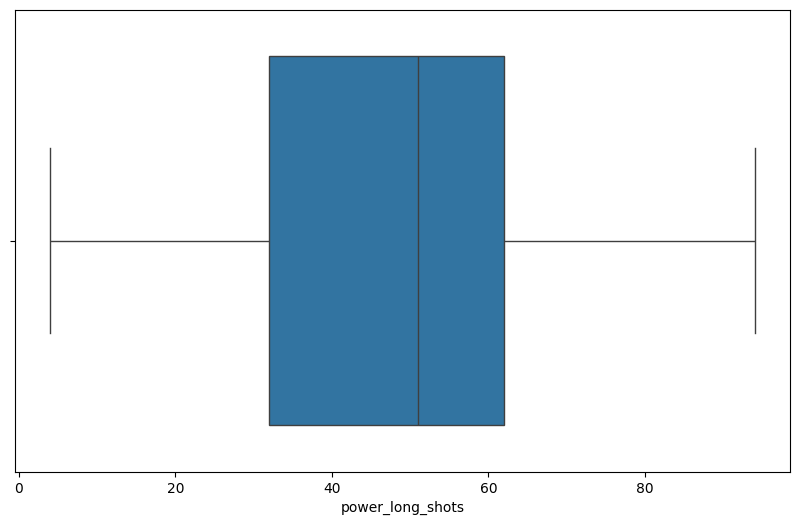

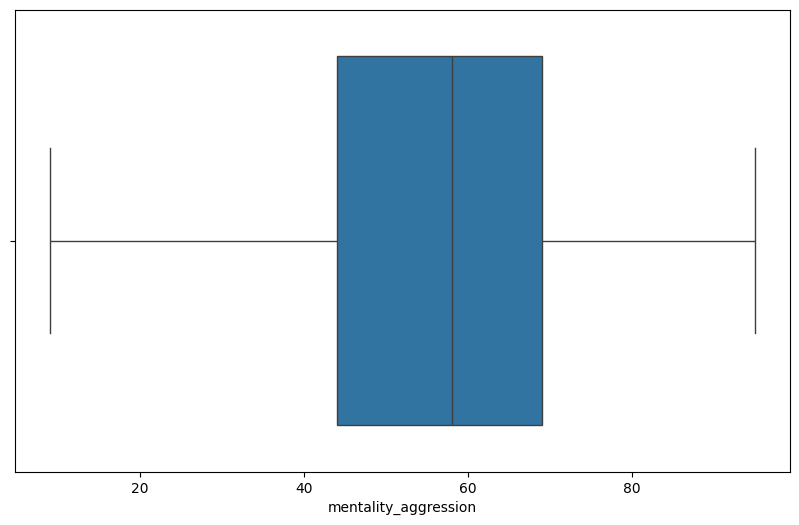

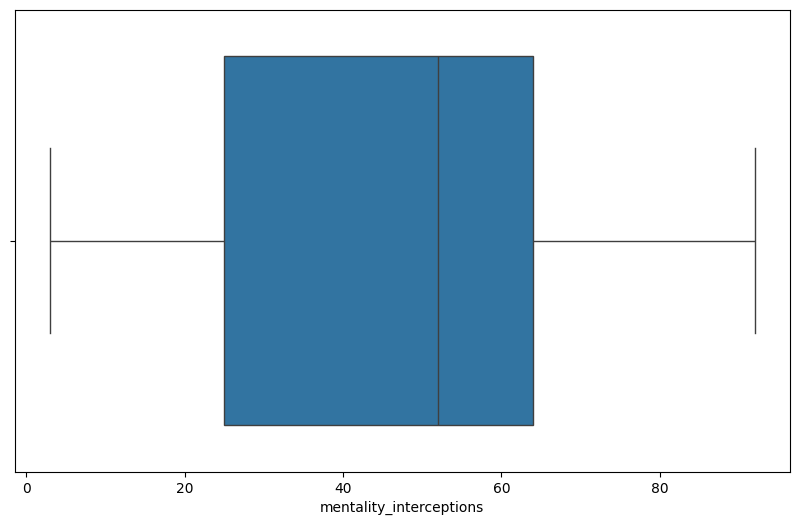

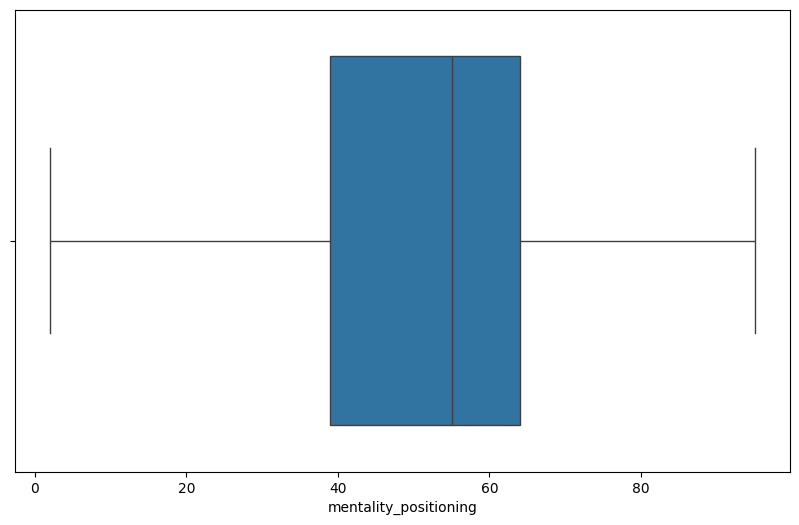

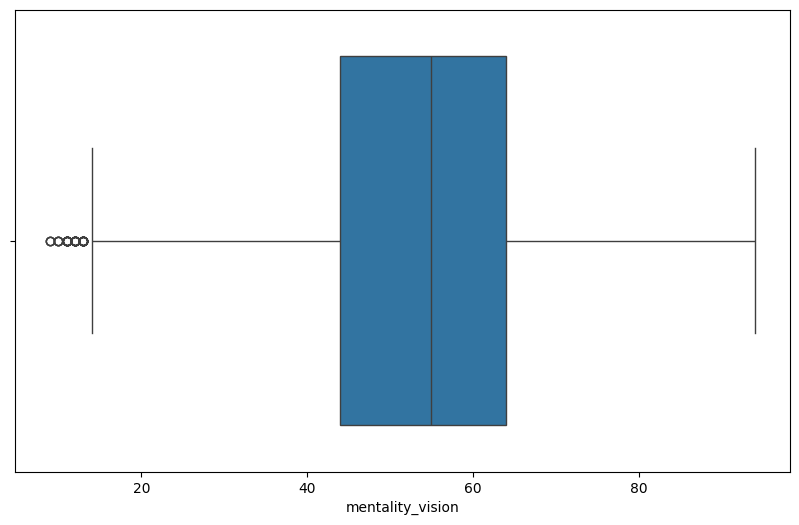

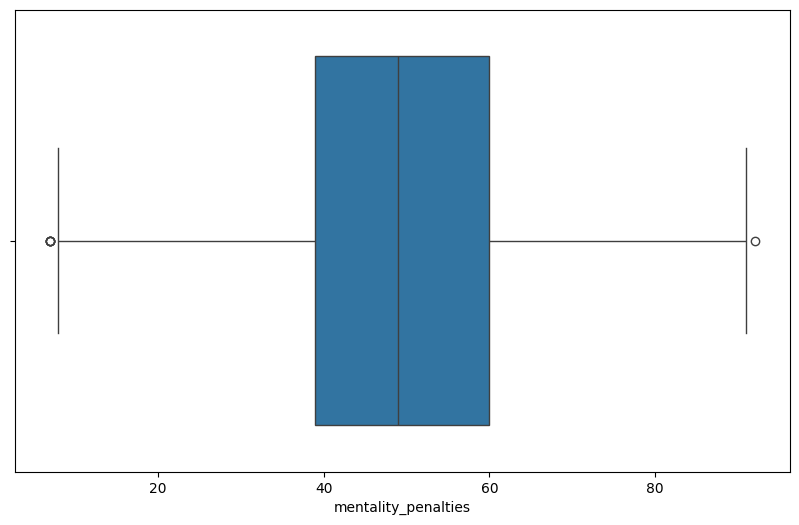

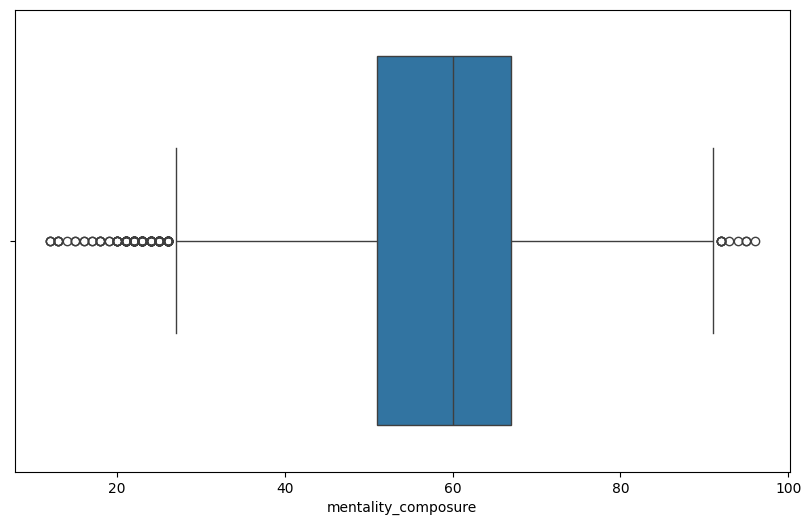

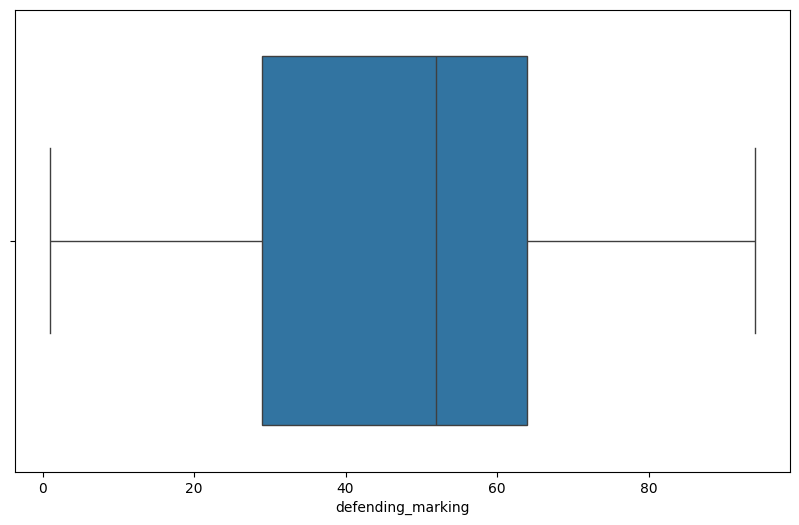

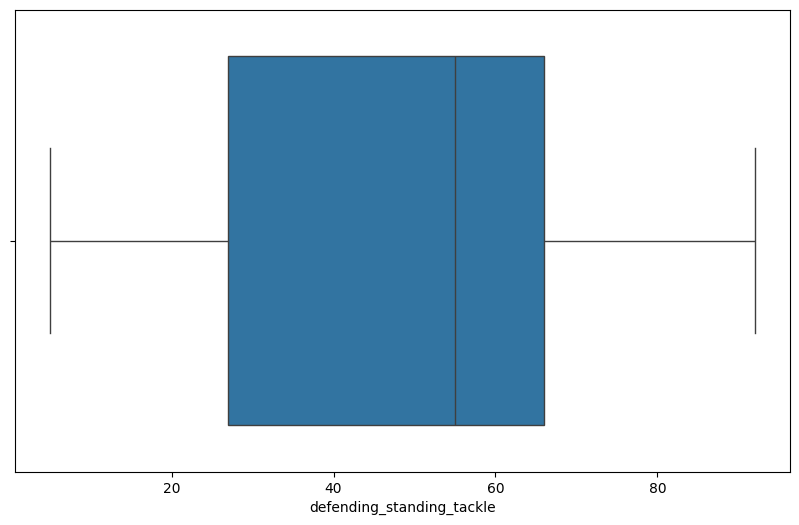

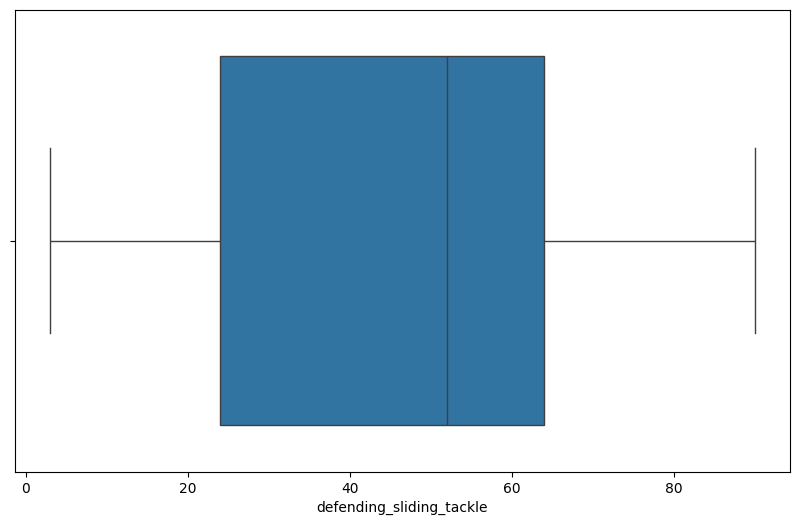

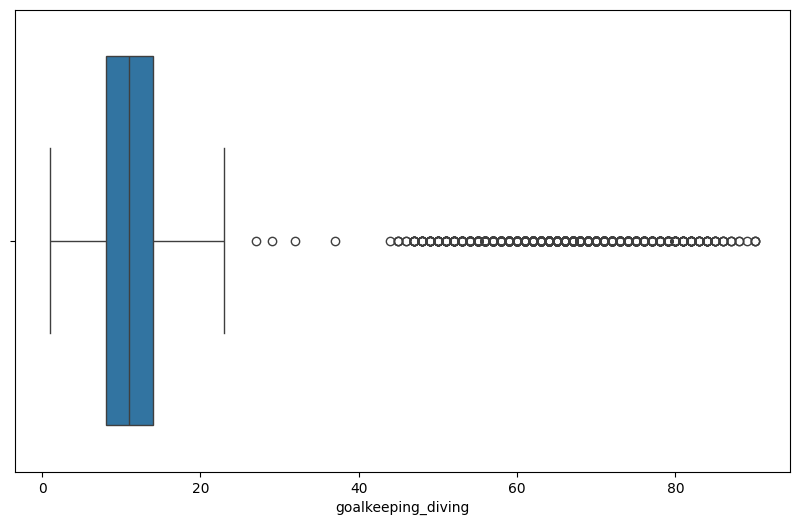

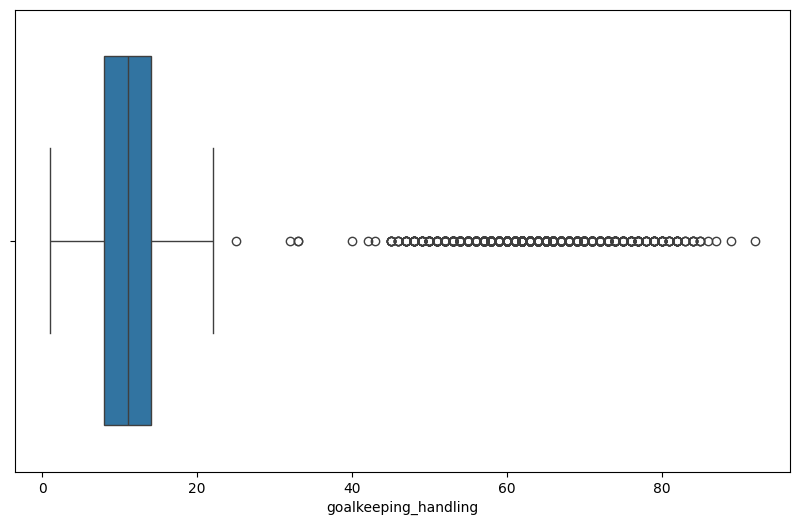

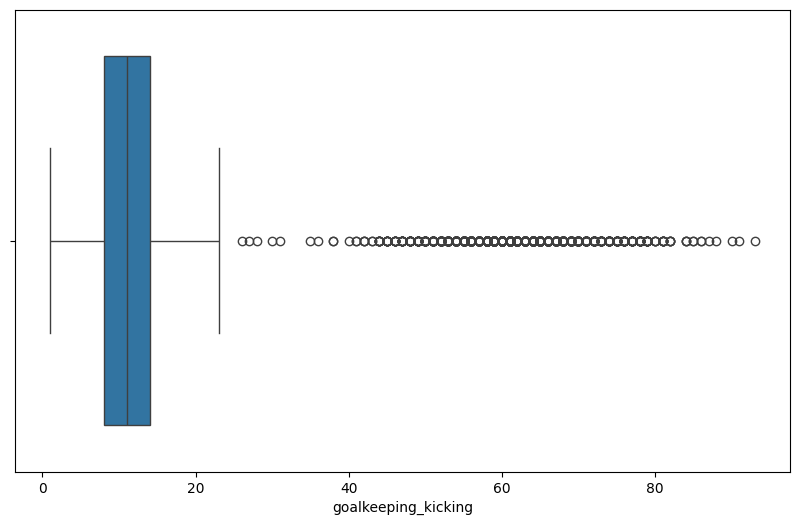

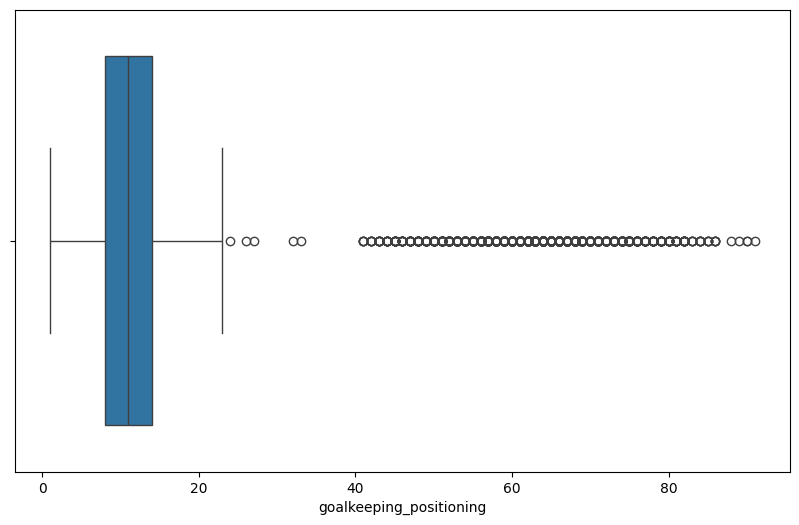

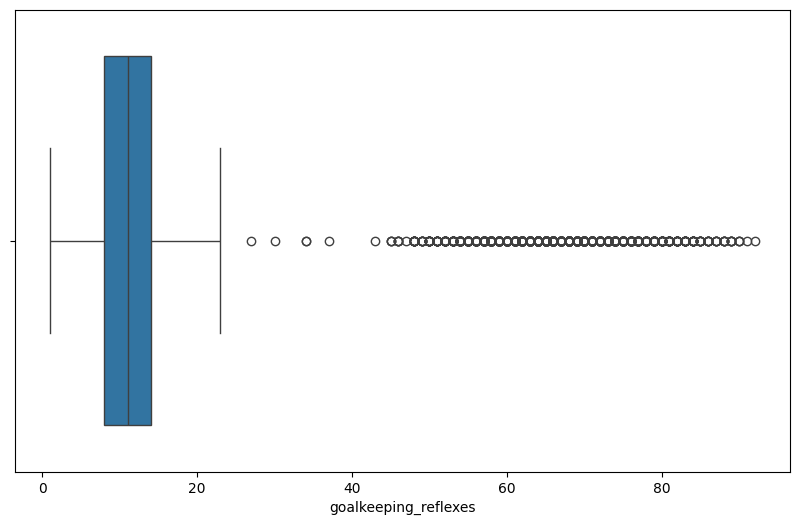

In [35]:
# boxplot for each numerical feature to closely examine its distribution and outliers

for col in num:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.show()

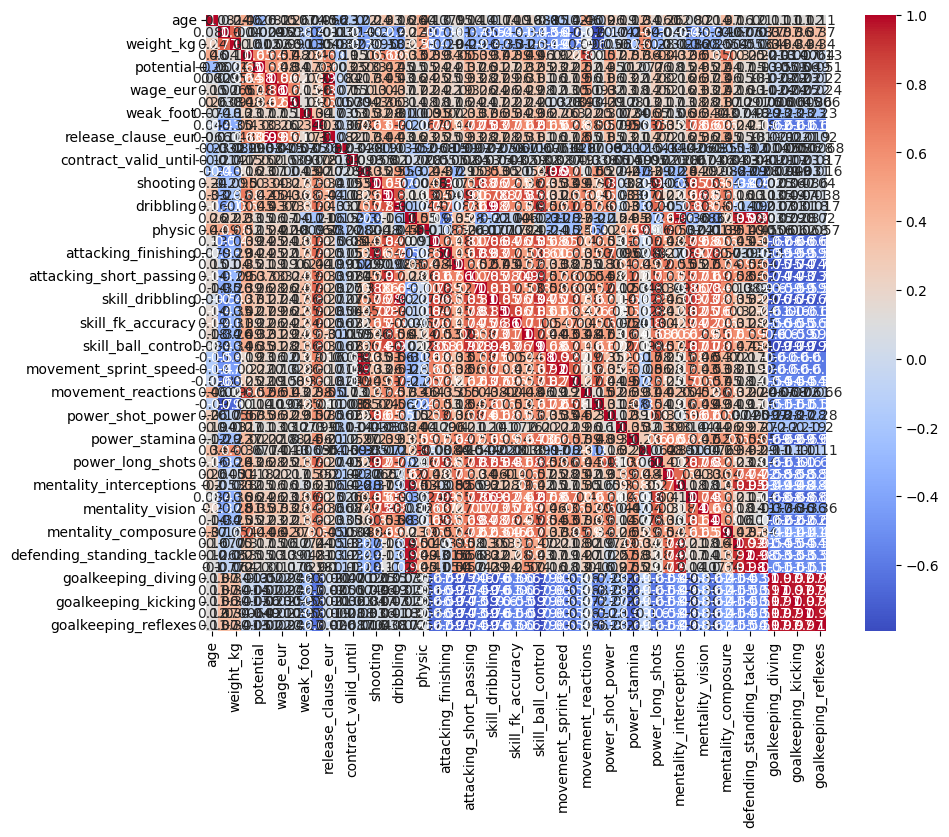

In [36]:
# Corelation Heatmap

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

## Exploratory Data Analysis (EDA) – Key Observations

- Numerical feature distributions show varying ranges and scales, with financial and performance-related attributes exhibiting wider spreads.
- Several features display right-skewed distributions, indicating the presence of high-value outliers.
- Boxplots revealed extreme values in attributes such as wages and skill ratings, justifying the need for outlier treatment.
- Correlation analysis showed strong relationships among multiple skill-based attributes, leading to redundancy.
- Feature scaling was required to prevent large-range variables from dominating distance-based models.
- PCA was applied to reduce dimensionality, remove multicollinearity, and improve clustering performance.


# Maulticolinearity

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   long_name                   18278 non-null  object 
 2   age                         18278 non-null  int64  
 3   dob                         18278 non-null  object 
 4   height_cm                   18278 non-null  int64  
 5   weight_kg                   18278 non-null  int64  
 6   nationality                 18278 non-null  object 
 7   club                        18278 non-null  object 
 8   overall                     18278 non-null  int64  
 9   potential                   18278 non-null  int64  
 10  value_eur                   18278 non-null  int64  
 11  wage_eur                    18278 non-null  int64  
 12  player_positions            18278 non-null  object 
 13  preferred_foot              182

In [38]:
# identify highly correlated numerical feature pairs

corr = df.select_dtypes(include=['int64', 'float64']).corr()
high_corr_pairs = []
threshold = 0.8
cols = corr.columns


for i in range(len(cols)):
    for j in range(i):
        val = corr.iloc[i, j]
        if abs(val) > threshold:
            high_corr_pairs.append((cols[i], cols[j], val))

# show shorted by absolute relation

high_corr_pairs = sorted(high_corr_pairs, key= lambda x : -abs(x[2]))
high_corr_pairs

[('release_clause_eur', 'value_eur', np.float64(0.993734574488999)),
 ('skill_dribbling', 'dribbling', np.float64(0.9794690562027936)),
 ('defending_sliding_tackle',
  'defending_standing_tackle',
  np.float64(0.9758079529756528)),
 ('defending_standing_tackle', 'defending', np.float64(0.9755729943401492)),
 ('movement_sprint_speed', 'pace', np.float64(0.9742045526479979)),
 ('goalkeeping_reflexes',
  'goalkeeping_diving',
  np.float64(0.9739221186596428)),
 ('goalkeeping_handling',
  'goalkeeping_diving',
  np.float64(0.9713296037823098)),
 ('goalkeeping_reflexes',
  'goalkeeping_handling',
  np.float64(0.9712440340934525)),
 ('goalkeeping_positioning',
  'goalkeeping_diving',
  np.float64(0.9712175148497596)),
 ('goalkeeping_reflexes',
  'goalkeeping_positioning',
  np.float64(0.971060246617497)),
 ('goalkeeping_positioning',
  'goalkeeping_handling',
  np.float64(0.9705171659411641)),
 ('goalkeeping_reflexes',
  'goalkeeping_kicking',
  np.float64(0.9678659596559638)),
 ('goalkeepin

In [39]:
df.columns

Index(['short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg',
       'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'team_position', 'team_jersey_number', 'joined',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', '

In [40]:
cat

Index(['short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'team_position', 'joined', 'player_traits', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'],
      dtype='object')

In [41]:
# Highly correlated features (ρ > 0.9) were removed to reduce redundancy and multicollinearity.
# Drop Categorical Columns Because K-Means works on distance, and categorical data has no meaningful distance.

drop_col = ['release_clause_eur', 'value_eur', 'movement_sprint_speed', 'movement_acceleration', 'skill_dribbling', 'skill_ball_control',
            'defending_standing_tackle', 'defending_sliding_tackle', 'defending_marking', 'goalkeeping_diving', 'goalkeeping_handling', 
            'goalkeeping_kicking', 'goalkeeping_positioning', 'attacking_finishing', 'attacking_short_passing', 'power_strength', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm','rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'short_name', 'long_name', 'dob', 'nationality', 'club','player_positions', 'preferred_foot', 'work_rate', 'body_type',
            'real_face', 'team_position', 'joined', 'player_traits']

### Drop All Co-related and Categorical Features
* To Avoid multicollinearity
* Reduce redundancy & noise
* Correlation works only on numeric data
* Distance-based models require numeric scale

In [42]:
df = df.drop(columns=drop_col)

In [43]:
num = df.select_dtypes(include=['int64', 'float64']).columns

In [44]:
num

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'goalkeeping_reflexes'],
      dtype='object')

## Outlier Detection

#### Using IQR-Method

In [45]:
iqr_outliers = {}

for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    outlier = df[(df[col] < lower) | (df[col] > upper)]
    iqr_outliers[col] = outlier.shape[0]

pd.DataFrame.from_dict(iqr_outliers, orient='index', columns=['outlier_count'])

outlier_count
age                                    19
height_cm                              89
weight_kg                              73
overall                               151
potential                             145
wage_eur                             2360
international_reputation             1484
weak_foot                            6931
skill_moves                            49
team_jersey_number                    711
contract_valid_until                    3
pace                                  342
shooting                                0
passing                                69
dribbling                             502
defending                               0
physic                                148
attacking_crossing                      0
attacking_heading_accuracy           1068
attacking_volleys                       0
skill_curve                             0
skill_fk_accuracy                       1
skill_long_passing                     13
movement_agility                      209
movement_reactions                    161
movement_balance                      248
power_shot_power                        4
power_jumping                         426
power_stamina                         923
power_long_shots                        0
mentality_aggression                    0
mentality_interceptions                 0
mentality_positioning                   0
mentality_vision                       51
mentality_penalties                     6
mentality_composure                   235
goalkeeping_reflexes                 2044

### Using Z-Score

In [46]:


zscore_outliers = {}

for col in num:
    z_scores = np.abs(zscore(df[col].dropna()))
    zscore_outliers[col] = (z_scores > 3).sum()

pd.DataFrame.from_dict(zscore_outliers, orient='index', columns=['outlier_counts'])

outlier_counts
age                                     19
height_cm                               27
weight_kg                               52
overall                                 40
potential                               56
wage_eur                               302
international_reputation               344
weak_foot                              245
skill_moves                             49
team_jersey_number                     546
contract_valid_until                    17
pace                                   132
shooting                                 0
passing                                 22
dribbling                               66
defending                                0
physic                                  34
attacking_crossing                       0
attacking_heading_accuracy               0
attacking_volleys                        0
skill_curve                              0
skill_fk_accuracy                        0
skill_long_passing                       0
movement_agility                        17
movement_reactions                      71
movement_balance                        36
power_shot_power                         5
power_jumping                           27
power_stamina                            7
power_long_shots                         0
mentality_aggression                     0
mentality_interceptions                  0
mentality_positioning                    0
mentality_vision                        20
mentality_penalties                      0
mentality_composure                     93
goalkeeping_reflexes                   610

### Treat Outlier Using IQR Method

In [47]:
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))

In [48]:
# Check for null Values
df.isnull().sum()[df.isnull().sum()>0]

team_jersey_number       240
contract_valid_until     240
pace                    2036
shooting                2036
passing                 2036
dribbling               2036
defending               2036
physic                  2036
dtype: int64

#### Fill Null Values

In [49]:
df[num] = df[num].apply(lambda x : x.fillna(x.median()))
df.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_heading_accuracy', 'attacking_volleys', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'goalkeeping_reflexes'],
      dtype='object')

In [50]:
df.isnull().sum()[df.isnull().sum() >0]

Series([], dtype: int64)

In [51]:
df.shape

(18278, 37)

In [52]:
# Use StandardScaler to standardize numerical features
scaler = StandardScaler()

In [53]:
x_scaler = scaler.fit_transform(df)
# PCA (Principal Component Analysis) to reduce dimensionality
pca = PCA()

In [54]:
pca_df = pca.fit_transform(x_scaler)

In [55]:
pca.explained_variance_ratio_

array([3.96689988e-01, 1.43540969e-01, 1.01871833e-01, 5.86653110e-02,
       4.47350527e-02, 3.64921546e-02, 2.54715560e-02, 2.36698591e-02,
       2.27888059e-02, 1.65421778e-02, 1.22955119e-02, 1.06656467e-02,
       9.30836019e-03, 8.96133264e-03, 8.03803712e-03, 7.52636531e-03,
       7.19606082e-03, 6.77246850e-03, 6.35703352e-03, 6.03529102e-03,
       5.54923866e-03, 5.16800380e-03, 4.95973567e-03, 4.31065850e-03,
       4.06407051e-03, 3.85585269e-03, 3.58515089e-03, 3.25394204e-03,
       2.81560186e-03, 2.40957105e-03, 2.10817651e-03, 1.43618656e-03,
       1.32044569e-03, 8.66433696e-04, 6.73117277e-04, 2.60311967e-17,
       1.31188511e-17])

In [88]:
# Initialize KMeans Model
km = KMeans(n_clusters=5)

In [89]:
# Train the KMeans Model
km.fit(pca_df)

KMeans(n_clusters=5)

In [90]:
# Check Labels for the Model
km.labels_

array([1, 1, 1, ..., 0, 0, 0], shape=(18278,), dtype=int32)

In [91]:
# Check Value count for different clusters
pd.DataFrame(km.labels_).value_counts()

0
2    4710
4    4417
1    3840
0    3275
3    2036
Name: count, dtype: int64

In [92]:
# Check Score of model on model
km.score(pca_df)

-320074.69671454304

In [93]:
silhouette_score(pca_df, km.labels_)

np.float64(0.1763764989311139)

In [94]:
# find cluster centers
cluster_center = pd.DataFrame(km.cluster_centers_)

In [95]:
cluster_center

0         1         2         3         4         5         6   \
0 -3.122892  1.462037 -2.101982 -0.018284  0.394506  0.006564 -0.176346   
1  4.732565  0.083515  1.142079  0.125178  0.127791 -0.021489 -0.009918   
2  0.007734 -2.510283 -0.551547 -0.394170  0.224626 -0.071066 -0.026733   
3 -6.699159  0.085868  3.713288  0.737667 -0.502535  0.116959  0.150210   
4  1.284819  1.478157 -0.556038 -0.015083 -0.411504  0.035629  0.098723   

         7         8         9   ...        27        28        29        30  \
0 -0.151882 -0.221735 -0.263813  ... -0.005981 -0.040378  0.021014  0.012005   
1  0.001689 -0.059464 -0.057917  ...  0.010738 -0.023981  0.014236  0.016586   
2 -0.071940 -0.110902  0.031763  ... -0.004093  0.027701 -0.022085 -0.014388   
3  0.128971  0.058981  0.178545  ...  0.023266 -0.013364  0.006976  0.006662   
4  0.128451  0.307177  0.129924  ... -0.011250  0.027430 -0.007639 -0.011054   

         31        32        33        34            35            36  
0 -0.023321  0.023547 -0.001063 -0.004022  2.185974e-16 -1.740582e-16  
1  0.022231  0.002513  0.006798  0.007012  6.780327e-16  4.492096e-17  
2 -0.012678 -0.002157 -0.000596 -0.007301 -5.303049e-16  1.173168e-16  
3  0.042298  0.014330  0.004084  0.006168  3.745530e-16  2.980772e-16  
4 -0.007992 -0.023959 -0.006365  0.001831 -3.587068e-16 -1.722627e-16  

[5 rows x 37 columns]

In [96]:
cluster_center

0         1         2         3         4         5         6   \
0 -3.122892  1.462037 -2.101982 -0.018284  0.394506  0.006564 -0.176346   
1  4.732565  0.083515  1.142079  0.125178  0.127791 -0.021489 -0.009918   
2  0.007734 -2.510283 -0.551547 -0.394170  0.224626 -0.071066 -0.026733   
3 -6.699159  0.085868  3.713288  0.737667 -0.502535  0.116959  0.150210   
4  1.284819  1.478157 -0.556038 -0.015083 -0.411504  0.035629  0.098723   

         7         8         9   ...        27        28        29        30  \
0 -0.151882 -0.221735 -0.263813  ... -0.005981 -0.040378  0.021014  0.012005   
1  0.001689 -0.059464 -0.057917  ...  0.010738 -0.023981  0.014236  0.016586   
2 -0.071940 -0.110902  0.031763  ... -0.004093  0.027701 -0.022085 -0.014388   
3  0.128971  0.058981  0.178545  ...  0.023266 -0.013364  0.006976  0.006662   
4  0.128451  0.307177  0.129924  ... -0.011250  0.027430 -0.007639 -0.011054   

         31        32        33        34            35            36  
0 -0.023321  0.023547 -0.001063 -0.004022  2.185974e-16 -1.740582e-16  
1  0.022231  0.002513  0.006798  0.007012  6.780327e-16  4.492096e-17  
2 -0.012678 -0.002157 -0.000596 -0.007301 -5.303049e-16  1.173168e-16  
3  0.042298  0.014330  0.004084  0.006168  3.745530e-16  2.980772e-16  
4 -0.007992 -0.023959 -0.006365  0.001831 -3.587068e-16 -1.722627e-16  

[5 rows x 37 columns]

# KMeans Cluster = 5 
## Model Observations

* Applied KMeans clustering with 5 clusters on standardized and PCA-transformed data to group observations based on similarity.

* The model produced a balanced cluster distribution, with cluster sizes ranging from approximately 2,000 to 4,700 observations, indicating stable segmentation.

* Achieved an inertia score of 343,909, reflecting effective minimization of within-cluster variance and compact cluster formation.

* PCA helped reduce feature correlation and noise, improving distance calculations and overall clustering quality.


## Conclusion

* KMeans effectively segmented the dataset into distinct and well-balanced clusters, making it suitable for exploratory analysis and pattern discovery.

* While the model demonstrates strong internal consistency, further validation and cluster profiling are required to derive actionable business insights.

### Implement Elbow Plot

In [97]:
ssd = []

for k in range(1,12):
    kmean_mall = KMeans(n_clusters=k)
    kmean_mall.fit(pca_df)
    score = kmean_mall.score(pca_df)
    ssd.append(score)
    print("value of k :",k)

value of k : 1
value of k : 2
value of k : 3
value of k : 4
value of k : 5
value of k : 6
value of k : 7
value of k : 8
value of k : 9
value of k : 10
value of k : 11


In [98]:
ssd = np.abs(ssd)

Text(0, 0.5, 'ssd')

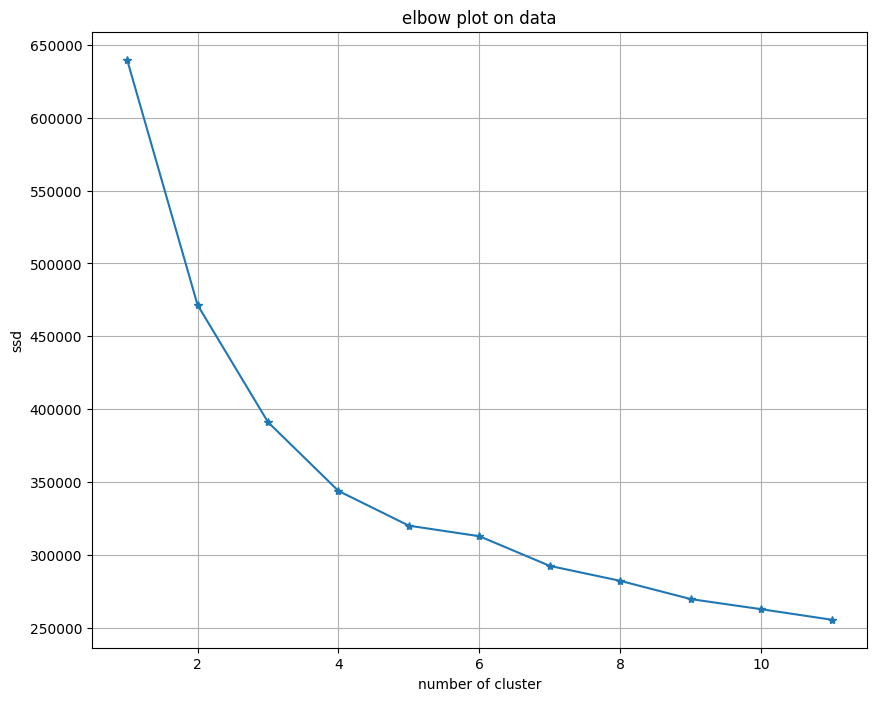

In [99]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,12)), ssd, marker='*')
plt.grid()
plt.title("elbow plot on data")
plt.xlabel("number of cluster")
plt.ylabel("ssd")

In [100]:
ssd

array([639730.        , 471474.40873035, 391099.72876909, 343909.63216435,
       320083.05160528, 312865.71205578, 292499.23581472, 282248.56088327,
       269735.62658465, 262801.26258612, 255587.77919761])

### Check Silhoutte Score for cluster range(2, 8)

In [101]:
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    kmeans.score(pca_df)
    print(k, silhouette_score(pca_df, kmeans.labels_))

2 0.23040569364462615
3 0.21850208062417828
4 0.19771647576653903
5 0.1763246836511859
6 0.16000601861881653
7 0.15401427923478928


Here silhouette score shows k=2 is the best but we can't select k=2 because
* Slight bump in silhouette

* But elbow shows diminishing returns

* More complex, less interpretable

Although K=2 achieved the highest silhouette score, it resulted in overly coarse segmentation.

K=4 was selected as it provides a balance between cluster separation, interpretability, and elbow method validation.

### Create KMeans Model for K=4

In [102]:
# Initialize Kmeans Model
km1 = KMeans(n_clusters=4, random_state=42)

In [103]:
# Train the Kmeans Model
km1.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [104]:
km1.score(pca_df)

-343909.39560296445

In [105]:
km1.labels_

array([2, 2, 2, ..., 3, 3, 3], shape=(18278,), dtype=int32)

In [106]:
pd.DataFrame(km1.labels_).value_counts()

0
2    6079
0    5624
3    4539
1    2036
Name: count, dtype: int64

In [107]:
# Check Silhoutte Score for new Kmeans model
silhouette_score(pca_df, km1.labels_)

np.float64(0.19771647576653903)

In [108]:
pca_df

array([[ 1.10541209e+01, -9.44746733e-01,  3.38958692e+00, ...,
        -3.44090743e-01,  6.38620373e-15,  1.90111414e-16],
       [ 1.02882646e+01,  1.67448312e+00,  4.11165978e+00, ...,
         1.47518692e-01,  8.40164101e-15, -1.24104445e-15],
       [ 1.03505059e+01, -1.70608266e+00,  3.54233514e+00, ...,
         1.15393036e-01,  2.41597504e-15,  3.30537865e-15],
       ...,
       [-4.89319000e+00, -1.41203846e+00, -2.64761179e+00, ...,
        -4.72165426e-02,  1.95966950e-15,  3.74864746e-15],
       [-4.40458693e+00, -1.59218594e+00, -2.40286597e+00, ...,
         3.90093774e-03,  9.89014641e-16,  3.61248120e-15],
       [-4.22792192e+00, -1.30201597e+00, -2.71246631e+00, ...,
         2.19732436e-01,  8.49442428e-15,  4.87575691e-16]],
      shape=(18278, 37))

# KMeans Clustering – Model Observations

* Applied KMeans clustering with 4 clusters on PCA-transformed data, resulting in a moderately balanced cluster distribution with sizes ranging from 2,036 to 6,079 observations.

* The model achieved an inertia score of 343,909, indicating reasonable cluster compactness by minimizing within-cluster distances.

* The silhouette score of 0.19 suggests weak to moderate cluster separation, with some overlap between clusters.

* PCA helped reduce dimensionality and correlation; however, the low silhouette score indicates that cluster boundaries are not strongly defined.


# Conclusion

* KMeans was able to segment the data into distinct groups, but the low silhouette score indicates limited separation, reducing cluster interpretability.

* Further tuning of the number of clusters, alternative distance metrics, or different clustering algorithms may be required for improved segmentation quality.

# Hierarchical Clustering

In [109]:
# Initialize Hierarchical Clustering Model
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')

In [110]:
# Train Hierarchical Clustering model
cluster.fit(x_scaler)

AgglomerativeClustering(n_clusters=5)

In [111]:
cluster.fit_predict(x_scaler)

array([3, 3, 3, ..., 1, 1, 1], shape=(18278,))

In [112]:
# Check Labels
cluster.labels_

array([3, 3, 3, ..., 1, 1, 1], shape=(18278,))

In [113]:
# Check value counts for clusters in model
pd.DataFrame(cluster.labels_).value_counts()

0
0    7268
3    3273
1    3257
4    2444
2    2036
Name: count, dtype: int64

In [114]:
# Silhouette Score for Hierarchical Clustering
silhouette_score(x_scaler, cluster.labels_)

np.float64(0.1375951197152225)

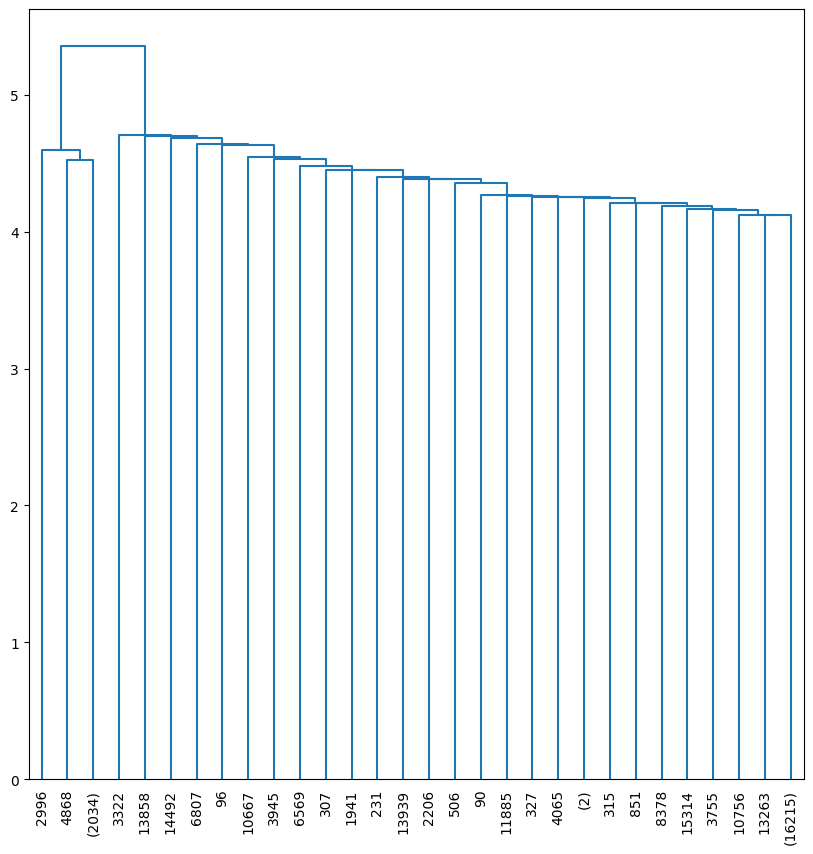

In [115]:
# plots a dendrogram using Hierarchical Clustering to understand the natural cluster structure

plt.figure(figsize=(10,10))
link_linkage = linkage(x_scaler, method='single')
dendrogram(link_linkage,
          truncate_mode='lastp',  # show only last p merged clusters
          p=30,                   # number of clusters to show
          leaf_rotation=90,
          leaf_font_size=10)
plt.show()

# Hierarchical Clustering – Model Observations

* Applied Hierarchical Clustering on standardized data, resulting in 5 clusters with sizes ranging from 2,036 to 7,268 observations, indicating uneven but meaningful segmentation.

* The cluster distribution shows one dominant cluster, suggesting that a large portion of the data shares similar characteristics.

* The silhouette score of 0.14 indicates weak cluster separation, with significant overlap between clusters.

* Despite scaling, the low silhouette score suggests that the hierarchical structure does not clearly capture distinct boundaries in the data.


# Conclusion

* Hierarchical Clustering provided a hierarchical view of data relationships but resulted in poor cluster separation, limiting interpretability.

* Further tuning of linkage methods or reducing dimensionality may be required to improve clustering performance.

# Model Comparision

In [116]:
Models = ["KMeans (k=5)", "KMeans (k=4)", "Hierarchical Clustering"]
No_of_Clusters = [5, 4, 5]
Cluster_Distribution = [
    "4707, 4418, 3839, 3278, 2036",
    "6079, 5624, 4539, 2036",
    "7268, 3273, 3257, 2444, 2036"
]
Inertia = [-343909.39, -343909.39, "N/A"]
Silhouette_Score = [0.1763, 0.1977, 0.1376]

Model_Comparison = pd.DataFrame({
    "Model": Models,
    "No. of Clusters": No_of_Clusters,
    "Cluster Distribution": Cluster_Distribution,
    "Inertia / Compactness": Inertia,
    "Silhouette Score": Silhouette_Score
})

Model_Comparison


Model  No. of Clusters          Cluster Distribution  \
0             KMeans (k=5)                5  4707, 4418, 3839, 3278, 2036   
1             KMeans (k=4)                4        6079, 5624, 4539, 2036   
2  Hierarchical Clustering                5  7268, 3273, 3257, 2444, 2036   

  Inertia / Compactness  Silhouette Score  
0            -343909.39            0.1763  
1            -343909.39            0.1977  
2                   N/A            0.1376

# Final Conclusion

* Three clustering models—KMeans (k=5), KMeans (k=4), and Hierarchical Clustering—were evaluated using cluster distribution, inertia, and silhouette score after proper scaling and dimensionality reduction.

* KMeans (k=4) achieved the highest silhouette score (0.19), indicating comparatively better cluster separation and more meaningful segmentation than the other approaches.

* KMeans (k=5) produced well-balanced clusters with strong compactness, making it suitable for exploratory segmentation despite the absence of silhouette validation.

* Hierarchical Clustering resulted in uneven cluster sizes and the lowest silhouette score (0.14), suggesting weak separation and overlapping clusters.

#### Overall, KMeans with k = 4 was identified as the most suitable clustering model for this dataset, offering the best balance between cluster compactness and separation.

# 📊 Predictive Modeling Report
### 1️⃣ Objective
The objective of this project is to segment football players into distinct groups based on their skills and attributes using unsupervised machine learning techniques.
This segmentation helps in player profiling, talent identification, tactical analysis, and recruitment decision-making by identifying players with similar performance characteristics.

--- 

### 2️⃣ Models Used
Three clustering approaches were implemented and compared to understand player similarity from different perspectives:
| Model                       | Purpose                                                     |
| --------------------------- | ----------------------------------------------------------- |
| **KMeans (k = 5)**          | Baseline clustering to create balanced player segments      |
| **KMeans (k = 4)**          | Optimized clustering based on silhouette score              |
| **Hierarchical Clustering** | To analyze hierarchical relationships and cluster structure |

---

### 3️⃣ Data Preprocessing & Feature Engineering
The following preprocessing steps were applied to ensure meaningful clustering:

* Removed identifier columns (e.g., player ID, URLs) as they do not contribute to similarity.

* Handled missing values and removed features with excessive missing data.

* Treated outliers using IQR-based capping to prevent distortion in distance calculations.

* Dropped highly correlated features to reduce redundancy.

* Applied StandardScaler to normalize feature scales.

* Used PCA (Principal Component Analysis) to reduce dimensionality and eliminate multicollinearity while preserving maximum variance.

---

### 4️⃣ Evaluation Metrics
Since clustering is unsupervised, traditional accuracy-based metrics are not applicable. Model evaluation focused on:
* Cluster Distribution → Ensures balanced segmentation
  
* Inertia (Compactness) → Measures within-cluster variance

* Silhouette Score → Measures cluster separation and cohesion

* Interpretability & Stability → Practical usability of clusters

---

### 5️⃣ Model Performance Summary
* KMeans (k = 4) achieved the highest silhouette score (0.19), indicating better separation between player groups.

* KMeans (k = 5) produced more evenly distributed clusters with strong compactness.

* Hierarchical Clustering resulted in uneven cluster sizes and the lowest silhouette score (0.14), indicating weaker separation.

---

### 6️⃣ Suggested Model for Final Use
#### ✅ KMeans with k = 4 is recommended as the final clustering model because:

* It provides better-defined and more separable clusters

* Produces meaningful segmentation after PCA

* Scales efficiently to large datasets

* Offers clear player grouping suitable for downstream analysis

Hierarchical Clustering remains useful for exploratory analysis, but is less suitable for final deployment due to lower cluster quality.

---

### 7️⃣ Key Insights from Player Clusters
* Based on clustering behavior and feature distributions, the following insights were observed:

* Players with similar technical skills (dribbling, ball control, passing) tend to cluster together.

* Financial attributes and overall ratings influence player grouping when not properly scaled, highlighting the importance of preprocessing.

* Clusters reflect distinct player profiles, such as:

    * Technically skilled attackers

    * Physically strong defenders

    * Balanced all-rounders

    * Developing or lower-rated players

---

### 8️⃣ Challenges Faced and Solutions
| Challenge                 | Solution                    | Reason                                     |
| ------------------------- | --------------------------- | ------------------------------------------ |
| High dimensionality       | Applied PCA                 | Reduced noise and improved clustering      |
| Feature scale imbalance   | Used StandardScaler         | Prevented dominance of high-range features |
| Presence of outliers      | IQR-based capping           | Retained data while limiting distortion    |
| Highly correlated skills  | Dropped correlated features | Reduced redundancy                         |
| Choosing optimal clusters | Compared silhouette scores  | Ensured better separation                  |

---

### 9️⃣ Business / Football Use Case Interpretation
#### 1️⃣ Talent Identification

* ➡️ Clubs can identify players with similar skill profiles to scout replacements or backups.

#### 2️⃣ Squad Planning

* ➡️ Coaches can group players based on strengths to design tactics and formations.

#### 3️⃣ Recruitment Optimization

* ➡️ Recruitment teams can target specific clusters that fit team requirements instead of evaluating players individually.

---

### 🔟 Conclusion

* A complete unsupervised learning pipeline was successfully implemented to cluster football players based on skill attributes.

* KMeans (k = 4) emerged as the most effective clustering model due to better cluster separation and stability.

* Proper preprocessing, scaling, and dimensionality reduction were critical to achieving meaningful results.

* The project demonstrates how machine learning can support data-driven decision-making in sports analytics, making it suitable for real-world applications.

<center><h1>Thank You</h1></center>